# Projeto 3 Ciência dos dados
  ### Michel Haikewitsch, Tiago Mingossi e Pedro Maciel
  #### Tema: CartolaFC

## Introdução ao tema:

 O CartolaFC é um dos fantasy games mais jogados do Brasil. Baseado no Campeonato Brasileiro e mantido pelo Grupo Globo, foi criado em 2005 e desde então seu número de jogadores aumenta todos os anos.

## Como funciona o jogo?


Cada cartoleiro (nome que o jogo dá aos jogadores) começa o jogo com 100 cartoletas
(moeda do Cartola FC. A pontuação do jogador é diretamente referente à atuação dele
naquela rodada e reflete a variação do seu valor para a rodada seguinte. Esse é um 
dos principais fatores do jogo, pois quando um atleta não consegue boa pontuação de
acordo com os critérios do fantasy game, o valor dele pode passar a ser negativo,
fazendo os cartoleiros que o escalaram perderem cartoletas.

# Importante!

Foi feito um documento com uma explicação mais detalhada de nossa análise, o "Parte teorica.pdf". É *de extrema importância* olhar o PDF junto com o jupyter

In [371]:
#importando tudo o que precisamos
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns; sns.set()  # for plot styling




import math
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as axes3d
from sklearn.mixture import GMM


from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.stats import *
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm

In [4]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\haik_000\Desktop\insper\meu\CD2017\Projeto3


In [478]:
#tabelas do campeonato de 2014
dados2=pd.read_csv('db/2014/scouts.csv',sep=',')
atletas2=pd.read_csv('db/2014/Atletas.csv',sep=',')
clubes2=pd.read_csv('db/2014/Clubes.csv',sep=',')
jogos2= pd.read_csv('db/2014/matches-brasileirao-2014.csv',sep=',')
partidas2=pd.read_csv('db/2014/Partidas.csv',sep=',')
posicoes2=pd.read_csv('db/2014/Posicoes.csv',sep=',')
#status2=pd.read_csv('db/2014/Status.csv',sep=',')



#tabelas do campeonato de 2015
dados15=pd.read_csv('db/2015/scouts.csv',sep=',')
atletas15=pd.read_csv('db/2015/Atletas.csv',sep=',')
clubes15=pd.read_csv('db/2015/Clubes.csv',sep=',')
jogos15= pd.read_csv('db/2015/matches-brasileirao-2015.csv',sep=',')
partidas15=pd.read_csv('db/2015/Partidas.csv',sep=',')
posicoes15=pd.read_csv('db/2015/Posicoes.csv',sep=',')
status15=pd.read_csv('db/2015/Status.csv',sep=',')

atletas15=atletas15.rename(columns={'ID': 'AtletaID'})
clubes15=clubes15.rename(columns={'ID': "ClubeID"})

dados15= pd.merge(dados15,atletas15[['AtletaID', 'PosicaoID', 'Apelido']], on='AtletaID')
dados15=pd.merge(dados15,clubes15[['ClubeID', 'Abreviacao']], on ="ClubeID")
columns15 = ['ClubeID', 'AtletaID'] 
dados15=dados15.rename(columns={'Abreviacao': 'Sigla'})
dados15=dados15.rename(columns={'Apelido': 'Atleta'})
clubes15=clubes15.rename(columns={'ID': "ClubeID"})

#tabelas do campeonato de 2016
dados=pd.read_csv('db/2016/scouts.csv',sep=',')
atletas=pd.read_csv('db/2016/Atletas.csv',sep=',')
clubes=pd.read_csv('db/2016/Clubes.csv',sep=',')
jogos= pd.read_csv('db/2016/matches-brasileirao-2016.csv',sep=',')
partidas=pd.read_csv('db/2016/Partidas.csv',sep=',')
posicoes=pd.read_csv('db/2016/Posicoes.csv',sep=',')
status=pd.read_csv('db/2016/Status.csv',sep=',')

atletas=atletas.rename(columns={'ID': "AtletaID"})
clubes=clubes.rename(columns={'ID': "ClubeID"})

dados= pd.merge(dados,atletas[['AtletaID', 'PosicaoID', 'Apelido']], on='AtletaID')
dados=pd.merge(dados,clubes[['ClubeID', 'Abreviacao']], on ="ClubeID")
columns = ['ClubeID', 'AtletaID'] 
dados=dados.rename(columns={'Abreviacao': 'Sigla'})
dados=dados.rename(columns={'Apelido': 'Atleta'})
clubes=clubes.rename(columns={'ID': "ClubeID"})

In [6]:
#dados da pontuacao dos jogadores separados por equipes
palmeiras= dados[dados.Sigla=="PAL"]
santos= dados[dados.Sigla=="SAN"]
flamengo= dados[dados.Sigla=='FLA' ]
atleticomg= dados[dados.Sigla=='CAM']
botafogo= dados[dados.Sigla=='BOT']
atleticopr= dados[dados.Sigla=='CAP']
corinthians= dados[dados.Sigla=='COR']
pontepreta= dados[dados.Sigla=='PON']
gremio= dados[dados.Sigla=='GRE']
saopaulo= dados[dados.Sigla=='SAO']
chapecoense= dados[dados.Sigla=='CHA']
cruzeiro= dados[dados.Sigla=='CRU']
fluminense= dados[dados.Sigla=='FLU']
sport= dados[dados.Sigla=='SPT']
coritiba= dados[dados.Sigla=='CFC']
vitoria= dados[dados.Sigla=='VIT']
internacional= dados[(dados.Sigla=='INT')]
figueirense= dados[(dados.Sigla=='FIG')]
santacruz= dados[(dados.Sigla=='SCZ')]
america= dados[dados.Sigla=='AME']

In [7]:
dados # plota os dados de 2016

,Rodada,ClubeID,AtletaID,Participou,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,...,GC,CA,CV,SG,DD,DP,GS,PosicaoID,Atleta,Sigla
0,0,294,37623,False,0.0,0.00,4.00,0.00,0,0,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC
1,1,294,37623,True,5.3,5.30,6.84,2.84,0,3,...,0,0,0,1,0,0,0,3,Rafael Marques,CFC
2,2,294,37623,True,-0.5,2.40,6.67,-0.17,0,0,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC
3,3,294,37623,True,2.3,2.37,6.98,0.31,1,2,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC
4,4,294,37623,True,-2.7,1.10,5.50,-1.48,0,3,...,0,1,0,0,0,0,0,3,Rafael Marques,CFC
5,5,294,37623,True,8.2,2.52,7.84,2.34,2,4,...,0,1,0,0,0,0,0,3,Rafael Marques,CFC
6,6,294,37623,True,0.3,2.15,6.55,-1.29,1,2,...,0,1,0,0,0,0,0,3,Rafael Marques,CFC
7,7,294,37623,False,0.0,2.15,6.55,0.00,0,0,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC
8,8,294,37623,True,1.1,2.00,6.50,-0.05,0,2,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC
9,9,294,37623,True,4.4,2.30,7.20,0.70,2,4,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC


In [8]:
palmeiras #plota os dados do palmeiras, campeao brasileiro de 2016

,Rodada,ClubeID,AtletaID,Participou,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,...,GC,CA,CV,SG,DD,DP,GS,PosicaoID,Atleta,Sigla
17458,0,275,38140,False,0.0,0.00,21.00,0.00,0,0,...,0,0,0,0,0,0,0,1,Fernando Prass,PAL
17459,1,275,38140,True,4.7,4.70,18.90,-2.10,0,1,...,0,0,0,1,0,0,0,1,Fernando Prass,PAL
17460,2,275,38140,True,-1.0,1.85,15.55,-3.35,0,0,...,0,0,0,0,1,0,2,1,Fernando Prass,PAL
17461,3,275,38140,True,7.7,3.80,16.72,1.17,0,1,...,0,0,0,1,1,0,0,1,Fernando Prass,PAL
17462,4,275,38140,True,9.7,5.28,17.82,1.10,0,1,...,0,0,0,0,4,0,1,1,Fernando Prass,PAL
17463,5,275,38140,True,-8.6,2.50,13.53,-4.29,0,2,...,0,1,0,0,0,0,3,1,Fernando Prass,PAL
17464,6,275,38140,True,-2.0,1.75,13.42,-0.11,0,0,...,0,0,0,0,0,0,1,1,Fernando Prass,PAL
17465,7,275,38140,True,4.6,2.16,14.58,1.16,1,3,...,0,0,0,1,0,0,0,1,Fernando Prass,PAL
17466,8,275,38140,True,2.0,2.14,13.98,-0.60,0,0,...,0,0,0,0,2,0,2,1,Fernando Prass,PAL
17467,9,275,38140,True,4.0,2.35,14.27,0.29,0,0,...,0,0,0,0,2,0,1,1,Fernando Prass,PAL


## Pontuação

A pontuação dos jogadores é baseada em seu desempenho na rodada, conforme pode ser visto abaixo

![defesa](defesa.jpg)
![defesa](ataque.jpg)


In [395]:
##### criando listas dos desempenhos de todos os clubes com base no desempenho do time como um todo
lista=np.arange(0,39,1)
listapal=[]
listasan=[]
listafla=[]

listacam=[]
listabot=[]
listacap=[]
listacor=[]
listapon=[]
listagre=[]
listasao=[]
listacha=[]
listacru=[]
listaflu=[]
listaspo=[]
listacfc=[]
listavit=[]
listaint=[]
listafig=[]
listascz=[]
listaame=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.Pontos.sum()
    listapal.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.Pontos.sum()
    listasan.append(p_santos)
    ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.Pontos.sum()
    listafla.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.Pontos.sum()
    listacam.append(p_atleticomg)
    ## botafogo
    p_botafogo=botafogo[botafogo.Rodada==i]
    p_botafogo=p_botafogo.Pontos.sum()
    listabot.append(p_botafogo)
    ## atleticopr
    p_atleticopr=atleticopr[atleticopr.Rodada==i]
    p_atleticopr=p_atleticopr.Pontos.sum()
    listacap.append(p_atleticopr)
    
    
    ## corinthians
    p_corinthians=corinthians[corinthians.Rodada==i]
    p_corinthians=p_corinthians.Pontos.sum()
    listacor.append(p_corinthians)
    ## pontepreta
    p_pontepreta=pontepreta[pontepreta.Rodada==i]
    p_pontepreta=p_pontepreta.Pontos.sum()
    listapon.append(p_pontepreta)
    ## gremio
    p_gremio=gremio[gremio.Rodada==i]
    p_gremio=p_gremio.Pontos.sum()
    listagre.append(p_gremio)
  
    ## saopaulo
    p_saopaulo=saopaulo[saopaulo.Rodada==i]
    p_saopaulo=p_saopaulo.Pontos.sum()
    listasao.append(p_saopaulo)
    ## chapecoense
    p_chapecoense=chapecoense[chapecoense.Rodada==i]
    p_chapecoense=p_chapecoense.Pontos.sum()
    listacha.append(p_chapecoense)
  
     ## cruzeiro
    p_cruzeiro=cruzeiro[cruzeiro.Rodada==i]
    p_cruzeiro=p_cruzeiro.Pontos.sum()
    listacru.append(p_cruzeiro)
    
     ## fluminense
    p_fluminense=fluminense[fluminense.Rodada==i]
    p_fluminense=p_fluminense.Pontos.sum()
    listaflu.append(p_fluminense)

         ## sport
    p_sport=sport[sport.Rodada==i]
    p_sport=p_sport.Pontos.sum()
    listaspo.append(p_sport)


    
         ## coritiba
    p_coritiba=coritiba[coritiba.Rodada==i]
    p_coritiba=p_coritiba.Pontos.sum()
    listacfc.append(p_coritiba)

         ## vitoria
    p_vitoria=vitoria[vitoria.Rodada==i]
    p_vitoria=p_vitoria.Pontos.sum()

    listavit.append(p_vitoria)

    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.Pontos.sum()
    listaint.append(p_internacional)

    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.Pontos.sum()
    listafig.append(p_figueirense)

    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.Pontos.sum()
    listascz.append(p_santacruz)

    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.Pontos.sum()
    listaame.append(p_america)
    


In [10]:
#criando nova dataframe que cruza as rodadas com a pontuacao da equipe
s = pd.DataFrame([lista,listapal, listasan,listafla,listacam,listabot,listacap,listacor,listapon,listagre,listasao,listacha,listacru,listaflu,listaspo,listacfc,listavit,listaint,listafig,listascz, listaame]).T
s.columns = ['Rodada','Palmeiras', 'Santos','Flamengo', 'AtleticoMG', 'Botafogo','AtleticoPR','Corinthians',"PontePreta",'Gremio','SaoPaulo','Chapecoense','Cruzeiro','Fluminense','Sport','Coritiba','Vitoria','Internacional', 'Figueirense','SantaCruz', 'AmericaMG']#, 'new_column_3']

s

,Rodada,Palmeiras,Santos,Flamengo,AtleticoMG,Botafogo,AtleticoPR,Corinthians,PontePreta,Gremio,...,Chapecoense,Cruzeiro,Fluminense,Sport,Coritiba,Vitoria,Internacional,Figueirense,SantaCruz,AmericaMG
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.0,86.51,23.56,79.75,64.50,18.22,-19.42,55.96,40.15,32.29,...,34.58,11.60,66.65,19.20,62.84,3.27,22.75,53.24,49.31,37.20
2,2.0,5.24,32.84,51.38,31.64,63.16,14.84,38.84,41.35,79.64,...,75.27,35.56,29.35,26.62,23.45,49.09,48.00,44.29,21.27,-4.69
3,3.0,71.56,31.09,35.10,26.07,76.04,24.65,65.02,10.80,118.04,...,34.15,13.20,15.27,19.75,46.47,31.09,47.89,29.78,77.24,18.00
4,4.0,16.91,21.93,22.25,31.31,24.33,39.49,76.47,26.73,58.80,...,21.27,59.67,77.67,13.31,10.04,61.09,83.45,38.95,20.51,48.76
5,5.0,47.78,13.20,65.02,40.69,28.91,37.20,65.78,47.02,44.84,...,46.04,86.29,27.16,72.33,64.40,-5.24,40.15,51.71,2.73,24.50
6,6.0,58.15,89.13,27.93,44.07,11.78,66.33,47.02,9.05,43.64,...,32.07,30.76,49.85,72.22,23.45,80.07,15.38,30.00,10.80,65.30
7,7.0,48.55,68.95,31.96,21.60,25.09,38.40,29.25,29.67,21.05,...,26.73,33.71,27.05,14.07,72.65,40.25,63.82,63.93,13.75,16.25
8,8.0,33.93,92.18,78.65,24.44,76.91,22.47,10.80,61.85,58.47,...,36.55,19.42,50.07,18.98,32.73,25.20,100.04,10.69,37.20,21.60
9,9.0,74.95,24.22,21.60,115.75,38.40,56.62,63.60,10.58,78.55,...,59.78,-3.71,38.62,61.53,32.29,50.18,57.60,45.60,26.29,38.95


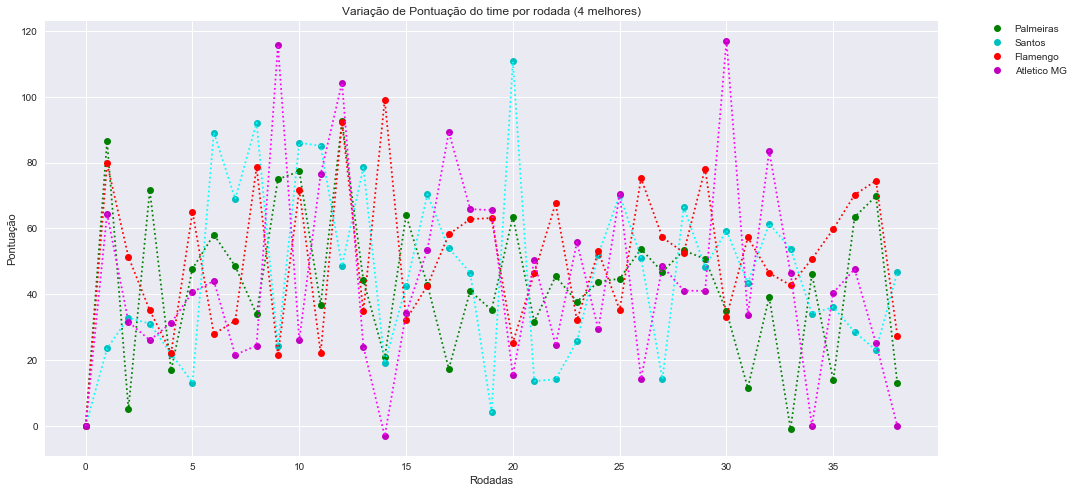

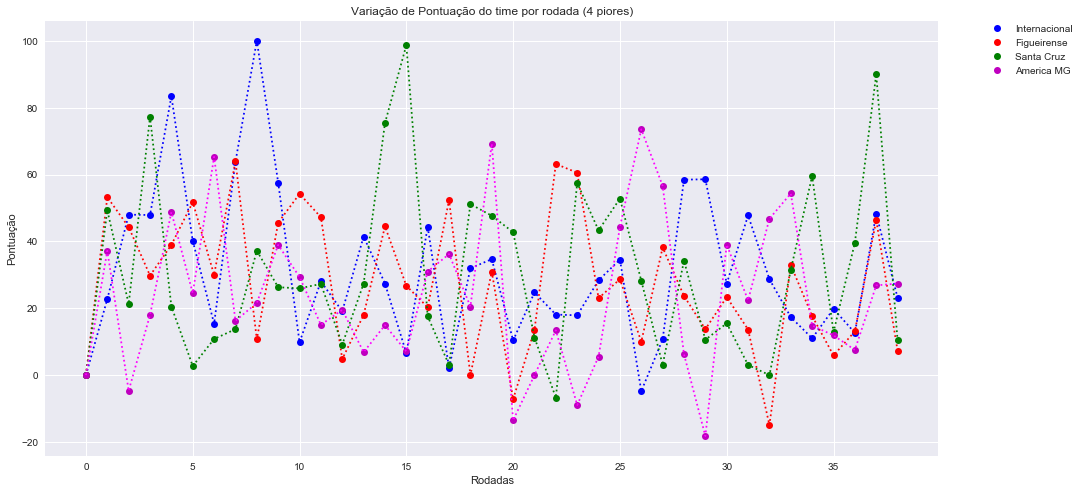

In [381]:
#plotando o desempenho dos 4 melhores e dos 4 piores por rodada
lista=np.arange(0,39,1)
listax=[]
listay=[]
listay2=[]
listay3=[]
listay4=[]
listay5=[]
listay6=[]
listay7=[]
listay8=[]
for i in range(len(lista)):
    x = s['Rodada'][i]
    listax.append(x)
    y = s['Palmeiras'][i]
    listay.append(y)
    y2 = s['Santos'][i]
    listay2.append(y2)
    y3 = s['Flamengo'][i]
    listay3.append(y3)
    y4 = s['AtleticoMG'][i]
    listay4.append(y4)
    y5 = s['Internacional'][i]
    listay5.append(y5)
    y6 = s['Figueirense'][i]
    listay6.append(y6)
    y7 = s['SantaCruz'][i]
    listay7.append(y7)
    y8 = s['AmericaMG'][i]
    listay8.append(y8)

plt.figure(figsize=(16,8))
plt.plot(listax,listay,'go',label='Palmeiras')
plt.plot(listax,listay,'k:', color='green')
plt.plot(listax,listay2,'co',label='Santos')
plt.plot(listax,listay2,'k:', color='cyan')
plt.plot(listax,listay3,'ro',label='Flamengo')
plt.plot(listax,listay3,'k:', color='red')
plt.plot(listax,listay4,'mo',label='Atletico MG')
plt.plot(listax,listay4,'k:', color='magenta')
plt.title("Variação de Pontuação do time por rodada (4 melhores)")
plt.xlabel('Rodadas')
plt.ylabel('Pontuação')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(16,8))
plt.plot(listax,listay5,'bo',label='Internacional')
plt.plot(listax,listay5,'k:', color='blue')
plt.plot(listax,listay6,'ro',label='Figueirense')
plt.plot(listax,listay6,'k:', color='red')
plt.plot(listax,listay7,'go',label='Santa Cruz')
plt.plot(listax,listay7,'k:', color='green')
plt.plot(listax,listay8,'mo',label='America MG')
plt.plot(listax,listay8,'k:', color='magenta')
plt.title("Variação de Pontuação do time por rodada (4 piores)")
plt.xlabel('Rodadas')
plt.ylabel('Pontuação')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Precificação

### Vamos analisar o preço de um time ao longo do campeonato, ou seja, quando custaria se eu quisesse escalar o time todo do Palmeiras, do Flamengo, etc.

## Exemplo
Vemos que Paolo Guerrero foi muito valorizado pela equipe do Cartola no início do game. Com o passar do tempo, seu preço mudava de acordo com seu desempenho, mas nunca chegou ao valor inicial.

Já o goleiro do Flamengo Alex Muralha surpreendeu. Seu valor começou baixo, porém com o bom desempenho ao longo do Brasileirão 2016 ele foi valorizando.

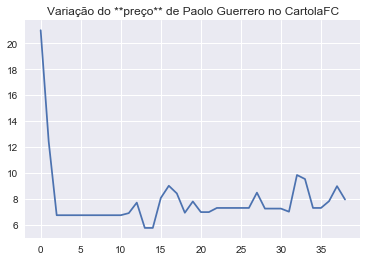

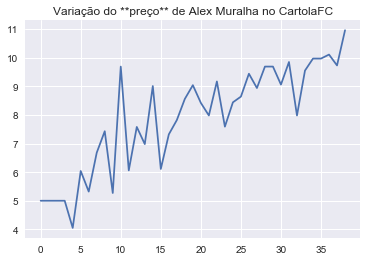

In [556]:
#exemplo de variacao de preco: preco de paolo guerrero
AtletaID = 75295 # ID de Paolo Guerrero
dados_atleta = dados[dados.AtletaID == AtletaID]
dados_atleta
x =dados_atleta['Rodada']
y = dados_atleta['Pontos']
z=dados_atleta['Preco']
#plt.plot(x,y)
plt.plot(x,z) 
plt.title("Variação do **preço** de Paolo Guerrero no CartolaFC")

AtletaID = 79066   # ID de Alex Muralha
dados_atleta = dados[dados.AtletaID == AtletaID]
dados_atleta
x =dados_atleta['Rodada']
y = dados_atleta['Pontos']
z=dados_atleta['Preco']
#plt.plot(x,y)
plt.show()

plt.plot(x,z) 
plt.title("Variação do **preço** de Alex Muralha no CartolaFC")
plt.show()


#print("Vemos que Paolo Guerrero foi muito valorizado pela equipe do Cartola no início do game. Com o passar do tempo, ele hora valorizava hora desvalorizava")

In [544]:
##### criando listas dos desempenhos de todos os clubes com base no **preco**
lista=np.arange(0,39,1)
listapal=[]
listasan=[]
listafla=[]

listacam=[]
listabot=[]
listacap=[]
listacor=[]
listapon=[]
listagre=[]
listasao=[]
listacha=[]
listacru=[]
listaflu=[]
listaspo=[]
listacfc=[]
listavit=[]
listaint=[]
listafig=[]
listascz=[]
listaame=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.Preco.sum()
    listapal.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.Preco.sum()
    listasan.append(p_santos)
    ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.Preco.sum()
    listafla.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.Preco.sum()
    listacam.append(p_atleticomg)
    ## botafogo
    p_botafogo=botafogo[botafogo.Rodada==i]
    p_botafogo=p_botafogo.Preco.sum()
    listabot.append(p_botafogo)
    ## atleticopr
    p_atleticopr=atleticopr[atleticopr.Rodada==i]
    p_atleticopr=p_atleticopr.Preco.sum()
    listacap.append(p_atleticopr)
    
    
    ## corinthians
    p_corinthians=corinthians[corinthians.Rodada==i]
    p_corinthians=p_corinthians.Preco.sum()
    listacor.append(p_corinthians)
    ## pontepreta
    p_pontepreta=pontepreta[pontepreta.Rodada==i]
    p_pontepreta=p_pontepreta.Preco.sum()
    listapon.append(p_pontepreta)
    ## gremio
    p_gremio=gremio[gremio.Rodada==i]
    p_gremio=p_gremio.Preco.sum()
    listagre.append(p_gremio)
  
    ## saopaulo
    p_saopaulo=saopaulo[saopaulo.Rodada==i]
    p_saopaulo=p_saopaulo.Preco.sum()
    listasao.append(p_saopaulo)
    ## chapecoense
    p_chapecoense=chapecoense[chapecoense.Rodada==i]
    p_chapecoense=p_chapecoense.Preco.sum()
    listacha.append(p_chapecoense)
  
     ## cruzeiro
    p_cruzeiro=cruzeiro[cruzeiro.Rodada==i]
    p_cruzeiro=p_cruzeiro.Preco.sum()
    listacru.append(p_cruzeiro)
    
     ## fluminense
    p_fluminense=fluminense[fluminense.Rodada==i]
    p_fluminense=p_fluminense.Preco.sum()
    listaflu.append(p_fluminense)

         ## sport
    p_sport=sport[sport.Rodada==i]
    p_sport=p_sport.Preco.sum()
    listaspo.append(p_sport)


    
         ## coritiba
    p_coritiba=coritiba[coritiba.Rodada==i]
    p_coritiba=p_coritiba.Preco.sum()
    listacfc.append(p_coritiba)

         ## vitoria
    p_vitoria=vitoria[vitoria.Rodada==i]
    p_vitoria=p_vitoria.Preco.sum()

    listavit.append(p_vitoria)

    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.Preco.sum()
    listaint.append(p_internacional)

    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.Preco.sum()
    listafig.append(p_figueirense)

    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.Preco.sum()
    listascz.append(p_santacruz)

    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.Preco.sum()
    listaame.append(p_america)
    


In [383]:
#criando nova dataframe com o preço de todos os jogadores da equipe conforme as rodadas
z = pd.DataFrame([lista,listapal, listasan,listafla,listacam,listabot,listacap,listacor,listapon,listagre,listasao,listacha,listacru,listaflu,listaspo,listacfc,listavit,listaint,listafig,listascz, listaame]).T
z.columns = ['Rodada','Palmeiras', 'Santos','Flamengo', 'AtleticoMG', 'Botafogo','AtleticoPR','Corinthians',"PontePreta",'Gremio','SaoPaulo','Chapecoense','Cruzeiro','Fluminense','Sport','Coritiba','Vitoria','Internacional', 'Figueirense','SantaCruz', 'AmericaMG']#, 'new_column_3']
z

,Rodada,Palmeiras,Santos,Flamengo,AtleticoMG,Botafogo,AtleticoPR,Corinthians,PontePreta,Gremio,...,Chapecoense,Cruzeiro,Fluminense,Sport,Coritiba,Vitoria,Internacional,Figueirense,SantaCruz,AmericaMG
0,0.0,287.00,272.00,213.00,295.00,180.00,192.00,288.50,168.00,249.00,...,146.00,221.00,213.00,202.00,218.00,150.00,230.00,150.00,159.00,115.00
1,1.0,308.00,255.70,233.30,339.83,172.45,148.33,286.77,175.25,232.28,...,152.18,204.02,224.57,188.58,236.15,134.90,218.41,168.77,174.10,132.36
2,2.0,294.89,246.33,244.74,323.84,188.37,133.55,272.79,176.17,245.13,...,178.21,210.41,217.53,180.24,236.94,139.03,218.63,189.68,176.27,137.44
3,3.0,304.25,243.93,242.74,318.01,200.76,128.66,278.53,166.86,267.15,...,175.44,204.35,207.94,173.34,235.65,135.56,229.35,190.18,188.81,137.99
4,4.0,292.01,239.23,224.92,316.58,209.77,131.46,285.32,165.65,269.68,...,168.95,210.82,241.98,170.83,212.02,144.78,240.84,192.92,182.87,145.64
5,5.0,294.31,240.15,232.64,311.44,210.21,125.85,287.00,169.78,265.25,...,175.29,217.85,234.80,183.87,224.36,132.55,235.94,199.96,174.08,142.81
6,6.0,295.74,258.83,224.36,309.70,203.88,135.67,282.20,166.63,263.82,...,174.73,209.64,229.78,188.19,215.49,148.19,228.79,195.12,170.25,152.06
7,7.0,292.61,265.41,237.55,328.23,204.09,130.75,256.24,168.97,269.64,...,192.09,209.96,210.59,183.14,224.68,147.21,234.92,207.17,169.82,134.35
8,8.0,288.90,269.90,246.63,322.81,214.36,130.11,241.75,176.80,273.14,...,193.76,200.72,214.36,185.43,220.22,144.64,244.80,197.98,175.21,134.68
9,9.0,293.46,259.99,237.83,338.95,216.40,135.24,248.67,167.98,277.57,...,199.18,194.90,209.44,193.71,216.86,149.57,239.96,199.63,172.86,137.93


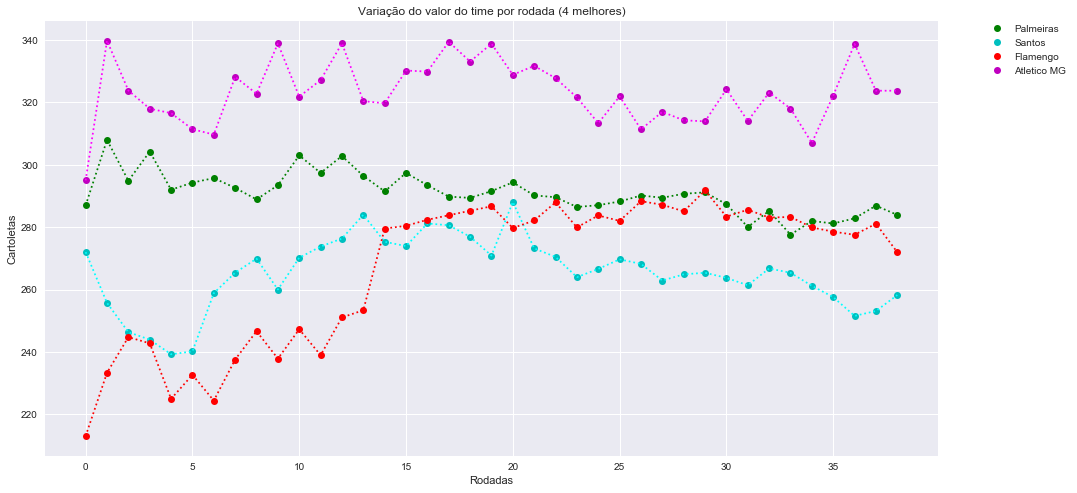

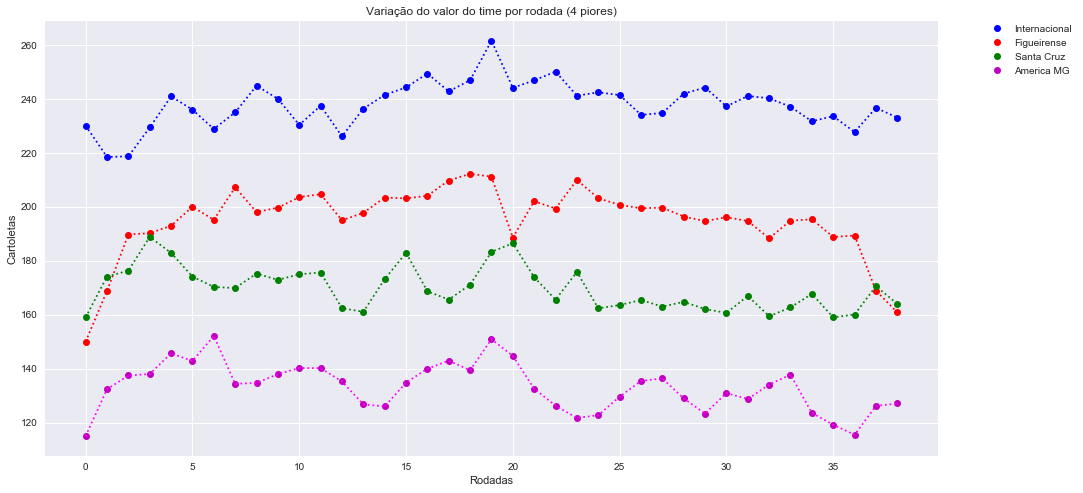

In [385]:
lista=np.arange(0,39,1)
listax=[]
listay=[]
listay2=[]
listay3=[]
listay4=[]
listay5=[]
listay6=[]
listay7=[]
listay8=[]

for i in range(len(lista)):
    x = z['Rodada'][i]
    listax.append(x)
    y = z['Palmeiras'][i]
    listay.append(y)
    y2 = z['Santos'][i]
    listay2.append(y2)
    y3 = z['Flamengo'][i]
    listay3.append(y3)
    y4 = z['AtleticoMG'][i]
    listay4.append(y4)
    y5 = z['Internacional'][i]
    listay5.append(y5)
    y6 = z['Figueirense'][i]
    listay6.append(y6)
    y7 = z['SantaCruz'][i]
    listay7.append(y7)
    y8 = z['AmericaMG'][i]
    listay8.append(y8)

plt.figure(figsize=(16,8))
plt.plot(listax,listay,'go',label='Palmeiras')
plt.plot(listax,listay,'k:', color='green')
plt.plot(listax,listay2,'co',label='Santos')
plt.plot(listax,listay2,'k:', color='cyan')
plt.plot(listax,listay3,'ro',label='Flamengo')
plt.plot(listax,listay3,'k:', color='red')
plt.plot(listax,listay4,'mo',label='Atletico MG')
plt.plot(listax,listay4,'k:', color='magenta')
plt.title("Variação do valor do time por rodada (4 melhores)")
plt.xlabel('Rodadas')
plt.ylabel('Cartoletas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(16,8))
plt.plot(listax,listay5,'bo',label='Internacional')
plt.plot(listax,listay5,'k:', color='blue')
plt.plot(listax,listay6,'ro',label='Figueirense')
plt.plot(listax,listay6,'k:', color='red')
plt.plot(listax,listay7,'go',label='Santa Cruz')
plt.plot(listax,listay7,'k:', color='green')
plt.plot(listax,listay8,'mo',label='America MG')
plt.plot(listax,listay8,'k:', color='magenta')
plt.title("Variação do valor do time por rodada (4 piores)")
plt.xlabel('Rodadas')
plt.ylabel('Cartoletas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Análise de outros dados
### A pontuação da equipe se deve a soma de diversos fatores, como faltas cometidas, gols feitos, gols contra, cartões, etc. Vemos abaixo uma análise dos 4 primeiros e dos 4 últimos com essa base

In [557]:
#criando listas com a somatoria de cartoes amarelos em cada rodada 

lista=np.arange(0,39,1)

listapal_CA=[]
listasan_CA=[]
listafla_CA=[]
listacam_CA=[]
listaint_CA=[]
listafig_CA=[]
listascz_CA=[]
listaame_CA=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.CA.sum()
    listapal_CA.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.CA.sum()
    listasan_CA.append(p_santos)
     ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.CA.sum()
    listafla_CA.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.CA.sum()
    listacam_CA.append(p_atleticomg)
    
    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.CA.sum()
    listaint_CA.append(p_internacional)
    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.CA.sum()
    listafig_CA.append(p_figueirense)
    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.CA.sum()
    listascz_CA.append(p_santacruz)
    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.CA.sum()
    listaame_CA.append(p_america)
    
    
#criando listas com a somatoria de cartoes vermelhos em cada rodada 
    
listapal_CV=[]
listasan_CV=[]
listafla_CV=[]
listacam_CV=[]
listaint_CV=[]
listafig_CV=[]
listascz_CV=[]
listaame_CV=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.CV.sum()
    listapal_CV.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.CV.sum()
    listasan_CV.append(p_santos)
     ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.CV.sum()
    listafla_CV.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.CV.sum()
    listacam_CV.append(p_atleticomg)
    
    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.CV.sum()
    listaint_CV.append(p_internacional)
    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.CV.sum()
    listafig_CV.append(p_figueirense)
    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.CV.sum()
    listascz_CV.append(p_santacruz)
    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.CV.sum()
    listaame_CV.append(p_america)
    

#criando listas com a somatoria de faltas cometidas em cada rodada 

listapal_FC=[]
listasan_FC=[]
listafla_FC=[]
listacam_FC=[]
listaint_FC=[]
listafig_FC=[]
listascz_FC=[]
listaame_FC=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.FC.sum()
    listapal_FC.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.FC.sum()
    listasan_FC.append(p_santos)
     ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.FC.sum()
    listafla_FC.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.FC.sum()
    listacam_FC.append(p_atleticomg)
    
    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.FC.sum()
    listaint_FC.append(p_internacional)
    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.FC.sum()
    listafig_FC.append(p_figueirense)
    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.FC.sum()
    listascz_FC.append(p_santacruz)
    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.FC.sum()
    listaame_FC.append(p_america)
    

#criando listas com a somatoria de gols em cada rodada 

listapal_G=[]
listasan_G=[]
listafla_G=[]
listacam_G=[]
listaint_G=[]
listafig_G=[]
listascz_G=[]
listaame_G=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.G.sum()
    listapal_G.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.G.sum()
    listasan_G.append(p_santos)
     ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.G.sum()
    listafla_G.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.G.sum()
    listacam_G.append(p_atleticomg)
    
    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.G.sum()
    listaint_G.append(p_internacional)
    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.G.sum()
    listafig_G.append(p_figueirense)
    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.G.sum()
    listascz_G.append(p_santacruz)
    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.G.sum()
    listaame_G.append(p_america)
    

In [558]:
#criando nova dataframe de cada em dos times
p = pd.DataFrame([lista,listapal_CA,listapal_CV,listapal_FC,listapal_G]).T
p.columns = ['Rodada','CA', 'CV','FC', 'G']
st = pd.DataFrame([lista,listasan_CA,listasan_CV,listasan_FC,listasan_G]).T
st.columns = ['Rodada','CA', 'CV','FC', 'G']
fl = pd.DataFrame([lista,listafla_CA,listafla_CV,listafla_FC,listafla_G]).T
fl.columns = ['Rodada','CA', 'CV','FC', 'G']
ca = pd.DataFrame([lista,listacam_CA,listacam_CV,listacam_FC,listacam_G]).T
ca.columns = ['Rodada','CA', 'CV','FC', 'G']
it = pd.DataFrame([lista,listaint_CA,listaint_CV,listaint_FC,listaint_G]).T
it.columns = ['Rodada','CA', 'CV','FC', 'G']
fi = pd.DataFrame([lista,listafig_CA,listafig_CV,listafig_FC,listafig_G]).T
fi.columns = ['Rodada','CA', 'CV','FC', 'G']
sc = pd.DataFrame([lista,listascz_CA,listascz_CV,listascz_FC,listascz_G]).T
sc.columns = ['Rodada','CA', 'CV','FC', 'G']
am = pd.DataFrame([lista,listaame_CA,listaame_CV,listaame_FC,listaame_G]).T
am.columns = ['Rodada','CA', 'CV','FC', 'G']

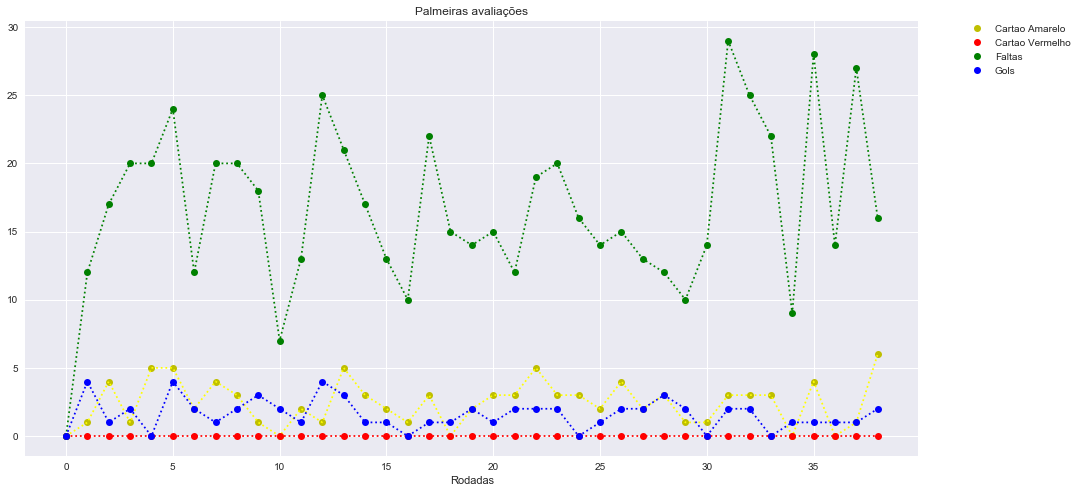

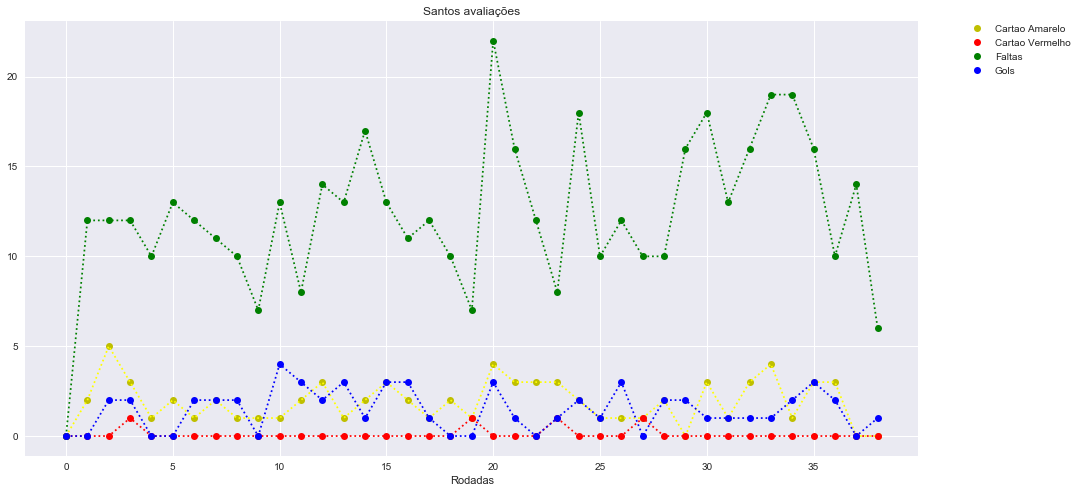

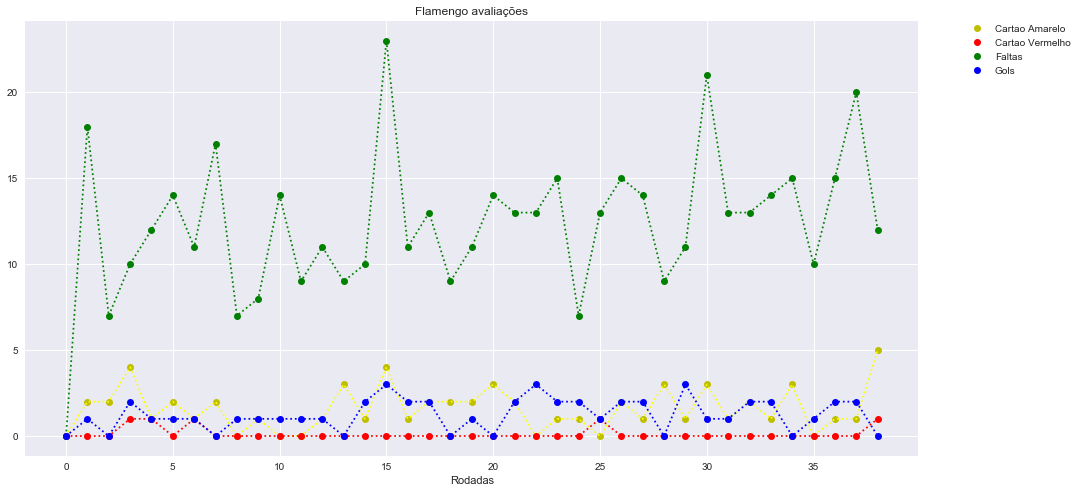

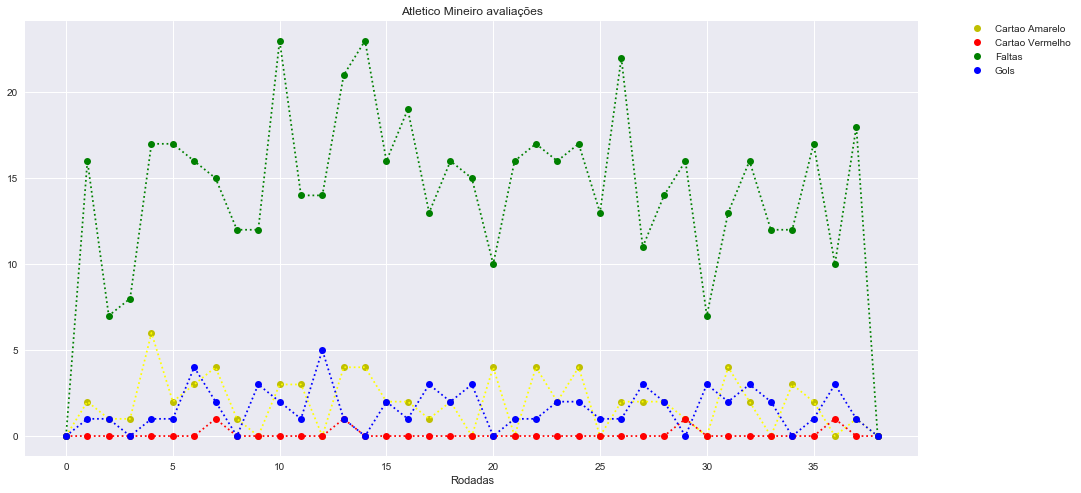

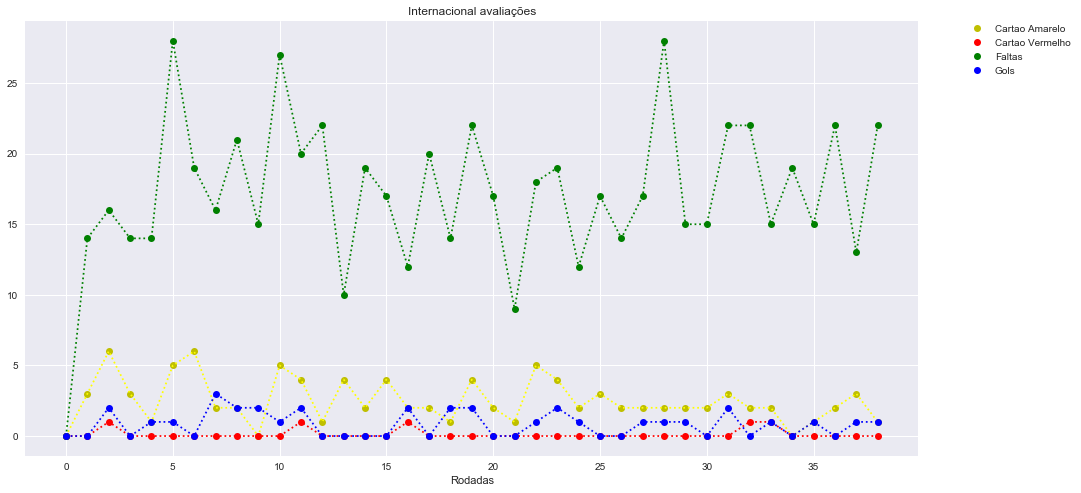

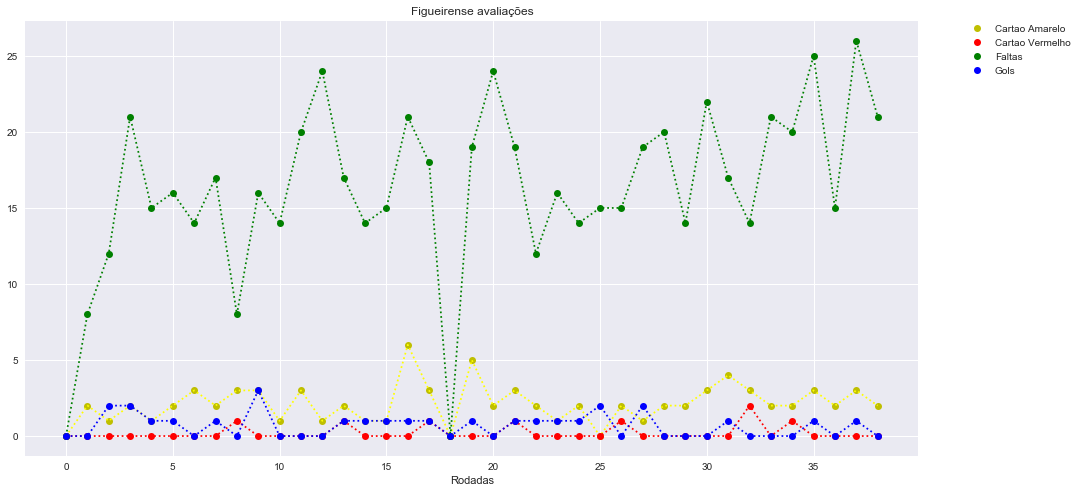

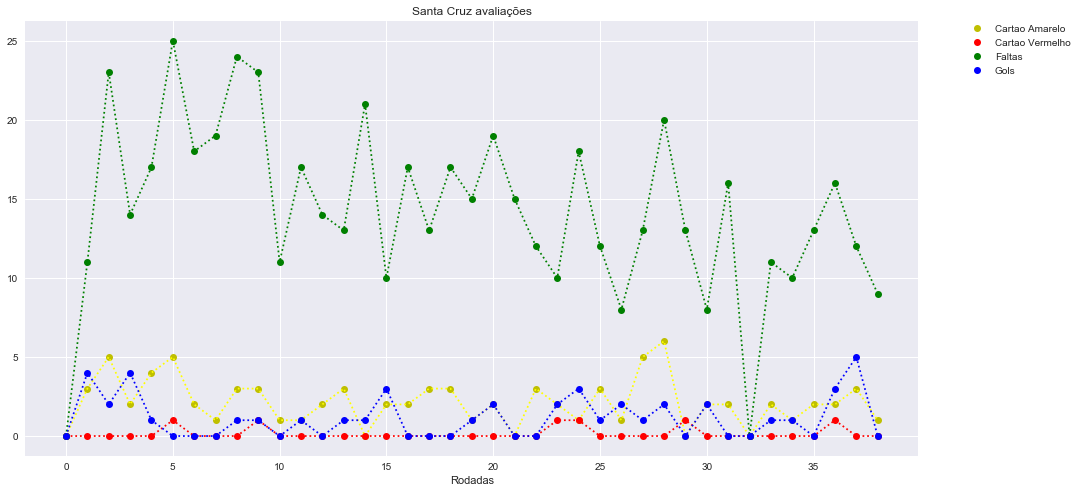

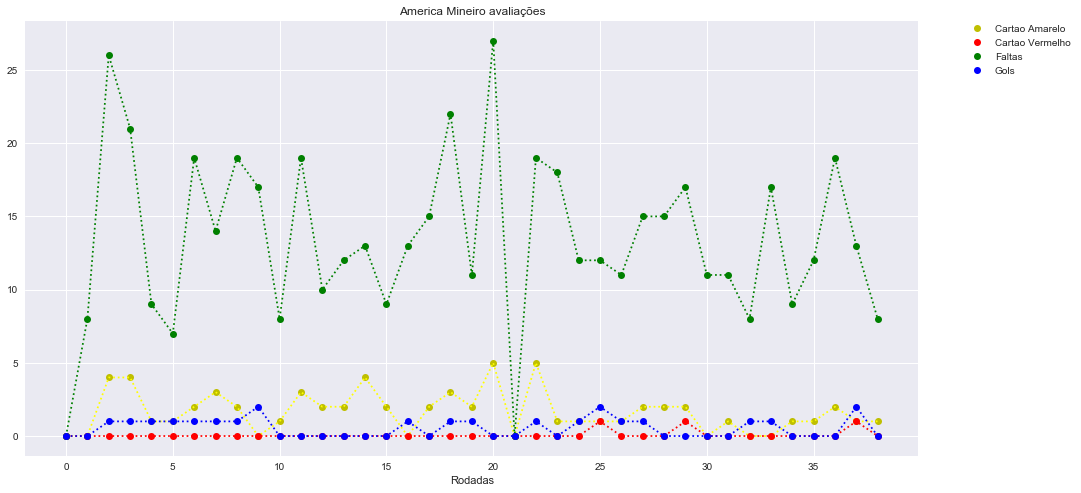

In [559]:
listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = p['Rodada'][i]
    listay.append(y)
    x = p['CA'][i]
    listax.append(x)
    x2 = p['CV'][i]
    listax2.append(x2)
    x3 = p['FC'][i]
    listax3.append(x3)
    x4 = p['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Palmeiras avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------

listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = st['Rodada'][i]
    listay.append(y)
    x = st['CA'][i]
    listax.append(x)
    x2 = st['CV'][i]
    listax2.append(x2)
    x3 = st['FC'][i]
    listax3.append(x3)
    x4 = st['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Santos avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------

listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = fl['Rodada'][i]
    listay.append(y)
    x = fl['CA'][i]
    listax.append(x)
    x2 = fl['CV'][i]
    listax2.append(x2)
    x3 = fl['FC'][i]
    listax3.append(x3)
    x4 = fl['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Flamengo avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------

listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = ca['Rodada'][i]
    listay.append(y)
    x = ca['CA'][i]
    listax.append(x)
    x2 = ca['CV'][i]
    listax2.append(x2)
    x3 = ca['FC'][i]
    listax3.append(x3)
    x4 = ca['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Atletico Mineiro avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------
listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = it['Rodada'][i]
    listay.append(y)
    x = it['CA'][i]
    listax.append(x)
    x2 = it['CV'][i]
    listax2.append(x2)
    x3 = it['FC'][i]
    listax3.append(x3)
    x4 = it['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Internacional avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------
listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = fi['Rodada'][i]
    listay.append(y)
    x = fi['CA'][i]
    listax.append(x)
    x2 = fi['CV'][i]
    listax2.append(x2)
    x3 = fi['FC'][i]
    listax3.append(x3)
    x4 = fi['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Figueirense avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------

listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = sc['Rodada'][i]
    listay.append(y)
    x = sc['CA'][i]
    listax.append(x)
    x2 = sc['CV'][i]
    listax2.append(x2)
    x3 = sc['FC'][i]
    listax3.append(x3)
    x4 = sc['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Santa Cruz avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------

listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = am['Rodada'][i]
    listay.append(y)
    x = am['CA'][i]
    listax.append(x)
    x2 = am['CV'][i]
    listax2.append(x2)
    x3 = am['FC'][i]
    listax3.append(x3)
    x4 = am['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("America Mineiro avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Como seria a tabela do Brasileirão se o critério fosse pontos do cartola, e nao pontos corridos?
### Uma explicação mais detalhada dessa análise pode ser visto no PDF "Parte teórica"

In [429]:
somapalmeiras=[sum(listapal[:y]) for y in range(1, 39 + 1)]
somasantos=[sum(listasan[:y]) for y in range(1, 39 + 1)]
somaflamengo=[sum(listafla[:y]) for y in range(1, 39 + 1)]
somaatleticomg=[sum(listacam[:y]) for y in range(1, 39 + 1)]
somabotafogo=[sum(listabot[:y]) for y in range(1, 39 + 1)]
somaatleticopr=[sum(listacap[:y]) for y in range(1, 39 + 1)]
somacorinthians=[sum(listacor[:y]) for y in range(1, 39 + 1)]
somapontepreta=[sum(listapon[:y]) for y in range(1, 39 + 1)]
somagremio=[sum(listagre[:y]) for y in range(1, 39 + 1)]
somasaopaulo=[sum(listasao[:y]) for y in range(1, 39 + 1)]
somachapecoense=[sum(listacha[:y]) for y in range(1, 39 + 1)]
somacruzeiro=[sum(listacru[:y]) for y in range(1, 39 + 1)]
somafluminense=[sum(listaflu[:y]) for y in range(1, 39 + 1)]
somasport=[sum(listaspo[:y]) for y in range(1, 39 + 1)]
somacoritiba=[sum(listacfc[:y]) for y in range(1, 39 + 1)]
somavitoria=[sum(listavit[:y]) for y in range(1, 39 + 1)]
somainternacional=[sum(listaint[:y]) for y in range(1, 39 + 1)]
somafigueirense=[sum(listafig[:y]) for y in range(1, 39 + 1)]
somasantacruz=[sum(listascz[:y]) for y in range(1, 39 + 1)]
somaamericamg=[sum(listaame[:y]) for y in range(1, 39 + 1)]



In [430]:
listasoma = pd.DataFrame([lista,somapalmeiras,somasantos,somaflamengo,somaatleticomg,somabotafogo,somaatleticopr,somacorinthians,somapontepreta,somagremio,somasaopaulo,somachapecoense,somacruzeiro,somafluminense,somasport,somacoritiba,somavitoria,somainternacional,somafigueirense,somasantacruz,somaamericamg]).T
listasoma.columns = ['Rodada','Palmeiras', 'Santos','Flamengo', 'AtleticoMG', 'Botafogo','AtleticoPR','Corinthians',"PontePreta",'Gremio','SaoPaulo','Chapecoense','Cruzeiro','Fluminense','Sport','Coritiba','Vitoria','Internacional', 'Figueirense','SantaCruz', 'AmericaMG']#, 'new_column_3']
listasoma

,Rodada,Palmeiras,Santos,Flamengo,AtleticoMG,Botafogo,AtleticoPR,Corinthians,PontePreta,Gremio,...,Chapecoense,Cruzeiro,Fluminense,Sport,Coritiba,Vitoria,Internacional,Figueirense,SantaCruz,AmericaMG
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.0,86.51,23.56,79.75,64.50,18.22,-19.42,55.96,40.15,32.29,...,34.58,11.60,66.65,19.20,62.84,3.27,22.75,53.24,49.31,37.20
2,2.0,91.75,56.40,131.13,96.14,81.38,-4.58,94.80,81.50,111.93,...,109.85,47.16,96.00,45.82,86.29,52.36,70.75,97.53,70.58,32.51
3,3.0,163.31,87.49,166.23,122.21,157.42,20.07,159.82,92.30,229.97,...,144.00,60.36,111.27,65.57,132.76,83.45,118.64,127.31,147.82,50.51
4,4.0,180.22,109.42,188.48,153.52,181.75,59.56,236.29,119.03,288.77,...,165.27,120.03,188.94,78.88,142.80,144.54,202.09,166.26,168.33,99.27
5,5.0,228.00,122.62,253.50,194.21,210.66,96.76,302.07,166.05,333.61,...,211.31,206.32,216.10,151.21,207.20,139.30,242.24,217.97,171.06,123.77
6,6.0,286.15,211.75,281.43,238.28,222.44,163.09,349.09,175.10,377.25,...,243.38,237.08,265.95,223.43,230.65,219.37,257.62,247.97,181.86,189.07
7,7.0,334.70,280.70,313.39,259.88,247.53,201.49,378.34,204.77,398.30,...,270.11,270.79,293.00,237.50,303.30,259.62,321.44,311.90,195.61,205.32
8,8.0,368.63,372.88,392.04,284.32,324.44,223.96,389.14,266.62,456.77,...,306.66,290.21,343.07,256.48,336.03,284.82,421.48,322.59,232.81,226.92
9,9.0,443.58,397.10,413.64,400.07,362.84,280.58,452.74,277.20,535.32,...,366.44,286.50,381.69,318.01,368.32,335.00,479.08,368.19,259.10,265.87


In [540]:
lista=np.arange(0,39,1)
listax=[]
listay=[]
listax2=[]
listay2=[]
listax3=[]
listay3=[]
listax4=[]
listay4=[]
listax5=[]
listay5=[]
listax6=[]
listay6=[]
listax7=[]
listay7=[]
listax8=[]
listay8=[]


for i in range(len(lista)):
    x = listasoma['Rodada'][i]
    listax.append(x)
    y = listasoma['Palmeiras'][i]
    listay.append(y)
    
    x2 = listasoma['Rodada'][i]
    listax2.append(x2)
    y2 = listasoma['Santos'][i]
    listay2.append(y2)
    
    x3 = listasoma['Rodada'][i]
    listax3.append(x3)
    y3 = listasoma['Flamengo'][i]
    listay3.append(y3)
    
    x4 = listasoma['Rodada'][i]
    listax4.append(x4)
    y4 = listasoma['AtleticoMG'][i]
    listay4.append(y4)
    
    x5 = listasoma['Rodada'][i]
    listax5.append(x5)
    y5 = listasoma['Internacional'][i]
    listay5.append(y5)

    x6 = listasoma['Rodada'][i]
    listax6.append(x6)
    y6 = listasoma['Figueirense'][i]
    listay6.append(y6)

    x7= listasoma['Rodada'][i]
    listax7.append(x7)
    y7 = listasoma['SantaCruz'][i]
    listay7.append(y7)

    x8 = listasoma['Rodada'][i]
    listax8.append(x8)
    y8 = listasoma['AmericaMG'][i]
    listay8.append(y8)

    
#para fazer em matplotlib tire os comentarios, em seaborn fica melhor!
'''
plt.figure(figsize=(16,8))
plt.plot(listax,listay,'bo',label='Palmeiras')
plt.plot(listax,listay,'k:', color='blue')

plt.plot(listax2,listay2,'ro',label='Santos')
plt.plot(listax2,listay2,'k:', color='red')

plt.plot(listax3,listay3,'go',label='Flamengo')
plt.plot(listax3,listay3,'k:', color='green')

plt.plot(listax4,listay4,'mo',label='America MG')
plt.plot(listax4,listay4,'k:', color='magenta')

plt.plot(listax5,listay5,'yo',label='Flamengo')
plt.plot(listax5,listay5,'k:', color='yellow')

plt.plot(listax5,listay5,'yo',label='Flamengo')
plt.plot(listax5,listay5,'k:', color='yellow')

plt.plot(listax5,listay5,'yo',label='Flamengo')
plt.plot(listax5,listay5,'k:', color='yellow')

plt.plot(listax5,listay5,'yo',label='Flamengo')
plt.plot(listax5,listay5,'k:', color='yellow')


plt.title("Pontuação acumulada das equipes por rodada")
plt.xlabel('Rodadas')
plt.ylabel('Pontuação')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
'''
print()

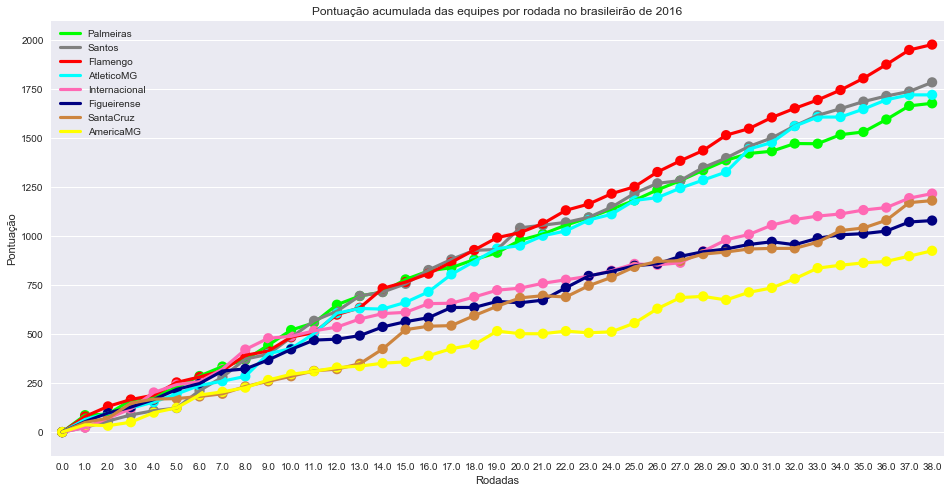

In [432]:

f, ax=plt.subplots(1,1, figsize=(16,8))
sns.pointplot(ax=ax, x=listax, y=listay, data=listasoma, color='lime') #pal
sns.pointplot(ax=ax, x=listax, y=listay2, data=listasoma,color='grey') #san
sns.pointplot(ax=ax, x=listax, y=listay3, data=listasoma,color='red') #fla
sns.pointplot(ax=ax, x=listax, y=listay4, data=listasoma,color='cyan') #cam
sns.pointplot(ax=ax, x=listax, y=listay5, data=listasoma,color='hotpink') #int
sns.pointplot(ax=ax, x=listax, y=listay6, data=listasoma,color='navy') #fig
sns.pointplot(ax=ax, x=listax, y=listay7, data=listasoma,color='peru') #scz
sns.pointplot(ax=ax, x=listax, y=listay8, data=listasoma,color='yellow') #ame

plt.xlabel('Rodadas')
plt.ylabel('Pontuação')
ax.legend(handles=ax.lines[::len(novo)+1],labels=["Palmeiras", "Santos",'Flamengo', 'AtleticoMG', 'Internacional', 'Figueirense', 'SantaCruz', 'AmericaMG'])
plt.title("Pontuação acumulada das equipes por rodada no brasileirão de 2016")
plt.show()

## Classificação oficial do Campeonato Brasileiro 2016
![2015](tabela-2016.png)


## Agora, vamos refazer a análise com base nos dados do Brasileirão 2015

In [479]:
dados15

,Rodada,ClubeID,AtletaID,Jogos,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,...,GC,CA,CV,SG,DD,DP,GS,PosicaoID,Atleta,Sigla
0,0,262,81219,0,0.00,0.00,1.00,0.00,0,0,...,0,0,0,0,0,0,0,2,Thallyson,fla
1,1,262,81219,0,0.00,0.00,1.00,0.00,0,0,...,0,0,0,0,0,0,0,2,Thallyson,fla
2,2,262,81219,0,0.00,0.00,1.00,0.00,0,0,...,0,0,0,0,0,0,0,2,Thallyson,fla
3,3,262,81219,0,0.00,0.00,1.00,0.00,0,0,...,0,0,0,0,0,0,0,2,Thallyson,fla
4,4,262,81219,0,0.00,0.00,1.00,0.00,0,0,...,0,0,0,0,0,0,0,2,Thallyson,fla
5,5,262,81219,0,0.00,0.00,1.00,0.00,0,0,...,0,0,0,0,0,0,0,2,Thallyson,fla
6,6,262,81219,0,0.00,0.00,1.00,0.00,0,0,...,0,0,0,0,0,0,0,2,Thallyson,fla
7,7,262,81219,0,0.00,0.00,1.00,0.00,0,0,...,0,0,0,0,0,0,0,2,Thallyson,fla
8,8,262,81219,0,0.00,0.00,1.00,0.00,0,0,...,0,0,0,0,0,0,0,2,Thallyson,fla
9,9,262,81219,0,0.00,0.00,1.00,0.00,0,0,...,0,0,0,0,0,0,0,2,Thallyson,fla


In [494]:
#dados15 da pontuacao dos jogadores separados por equipes
palmeiras15= dados15[dados15.Sigla=="pal"]
santos15= dados15[dados15.Sigla=="san"]
flamengo15= dados15[dados15.Sigla=='fla' ]
atleticomg15= dados15[dados15.Sigla=='cam']
atleticopr15= dados15[dados15.Sigla=='cap']
corinthians15= dados15[dados15.Sigla=='cor']
pontepreta15= dados15[dados15.Sigla=='pon']
gremio15= dados15[dados15.Sigla=='gre']
saopaulo15= dados15[dados15.Sigla=='sao']
chapecoense15= dados15[dados15.Sigla=='cha']
cruzeiro15= dados15[dados15.Sigla=='cru']
fluminense15= dados15[dados15.Sigla=='flu']
sport15= dados15[dados15.Sigla=='spo']
coritiba15= dados15[dados15.Sigla=='cfc']
internacional15= dados15[(dados15.Sigla=='int')]
figueirense15= dados15[(dados15.Sigla=='fig')]
avai15=dados15[(dados15.Sigla=='ava')]
vasco15=dados15[(dados15.Sigla=='vas')]
joinville15=dados15[(dados15.Sigla=='jec')]
goias15=dados15[(dados15.Sigla=='goi')]

sport15

,Rodada,ClubeID,AtletaID,Jogos,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,...,GC,CA,CV,SG,DD,DP,GS,PosicaoID,Atleta,Sigla
10443,6,292,80944,1,0.00,0.50,5.03,0.00,1,0,...,0,0,0,0,0,0,0,4,Marlone,spo
10444,7,292,80944,1,0.00,0.50,5.03,0.00,1,0,...,0,0,0,0,0,0,0,4,Marlone,spo
10445,8,292,80944,2,0.60,0.55,4.72,-0.31,2,3,...,0,0,0,0,0,0,0,4,Marlone,spo
10446,9,292,80944,3,-2.20,-0.37,4.01,-0.71,2,6,...,0,1,0,0,0,0,0,4,Marlone,spo
10447,10,292,80944,4,11.30,2.55,6.80,2.79,4,8,...,0,1,0,0,0,0,0,4,Marlone,spo
10448,11,292,80944,5,1.00,2.24,5.20,-1.60,7,12,...,0,1,0,0,0,0,0,4,Marlone,spo
10449,12,292,80944,6,2.30,2.25,5.43,0.23,7,13,...,0,1,0,0,0,0,0,4,Marlone,spo
10450,13,292,80944,7,1.10,2.09,5.26,-0.17,12,15,...,0,2,0,0,0,0,0,4,Marlone,spo
10451,14,292,80944,8,10.20,3.10,7.22,1.96,13,17,...,0,2,0,0,0,0,0,4,Marlone,spo
10452,15,292,80944,9,-0.10,2.74,5.53,-1.69,13,19,...,0,2,0,0,0,0,0,4,Marlone,spo


In [495]:
##### criando listas dos desempenhos de todos os clubes com base no desempenho do time como um todo
lista=np.arange(0,39,1)
listapal15=[]
listasan15=[]
listafla15=[]
listacam15=[]
listabot15=[]
listacap15=[]
listacor15=[]
listapon15=[]
listagre15=[]
listasao15=[]
listacha15=[]
listacru15=[]
listaflu15=[]
listaspo15=[]
listacfc15=[]
listavit15=[]
listaint15=[]
listafig15=[]
listascz15=[]
listaame15=[]
listavas15=[]
listagoi15=[]
listajec15=[]
listaava15=[]
lista15=lista

In [496]:
for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras15=palmeiras15[palmeiras15.Rodada==i]
    p_palmeiras15=p_palmeiras15.Pontos.sum()
    listapal15.append(p_palmeiras15)
    ## santos
    p_santos15=santos15[santos15.Rodada==i]
    p_santos15=p_santos15.Pontos.sum()
    listasan15.append(p_santos15)
    ## flamengo
    p_flamengo15=flamengo15[flamengo15.Rodada==i]
    p_flamengo15=p_flamengo15.Pontos.sum()
    listafla15.append(p_flamengo15)
    ## atleticomg
    p_atleticomg15=atleticomg15[atleticomg15.Rodada==i]
    p_atleticomg15=p_atleticomg15.Pontos.sum()
    listacam15.append(p_atleticomg15)
   
    ## atleticopr
    p_atleticopr15=atleticopr15[atleticopr15.Rodada==i]
    p_atleticopr15=p_atleticopr15.Pontos.sum()
    listacap15.append(p_atleticopr15)
    
    
    ## corinthians
    p_corinthians15=corinthians15[corinthians15.Rodada==i]
    p_corinthians15=p_corinthians15.Pontos.sum()
    listacor15.append(p_corinthians15)
    ## pontepreta
    p_pontepreta15=pontepreta15[pontepreta15.Rodada==i]
    p_pontepreta15=p_pontepreta15.Pontos.sum()
    listapon15.append(p_pontepreta15)
    ## gremio
    p_gremio15=gremio15[gremio15.Rodada==i]
    p_gremio15=p_gremio15.Pontos.sum()
    listagre15.append(p_gremio15)
  
    ## saopaulo
    p_saopaulo15=saopaulo15[saopaulo15.Rodada==i]
    p_saopaulo15=p_saopaulo15.Pontos.sum()
    listasao15.append(p_saopaulo15)
    ## chapecoense
    p_chapecoense15=chapecoense15[chapecoense15.Rodada==i]
    p_chapecoense15=p_chapecoense15.Pontos.sum()
    listacha15.append(p_chapecoense15)
  
     ## cruzeiro
    p_cruzeiro15=cruzeiro15[cruzeiro15.Rodada==i]
    p_cruzeiro15=p_cruzeiro15.Pontos.sum()
    listacru15.append(p_cruzeiro15)

     ## fluminense
    p_fluminense15=fluminense15[fluminense15.Rodada==i]
    p_fluminense15=p_fluminense15.Pontos.sum()
    listaflu15.append(p_fluminense15)

         ## sport
    p_sport15=sport15[sport15.Rodada==i]
    p_sport15=p_sport15.Pontos.sum()
    listaspo15.append(p_sport15)


    
         ## coritiba
    p_coritiba15=coritiba15[coritiba15.Rodada==i]
    p_coritiba15=p_coritiba15.Pontos.sum()
    listacfc15.append(p_coritiba15)

      
    ## internacional
    p_internacional15=internacional15[internacional15.Rodada==i]
    p_internacional15=p_internacional15.Pontos.sum()
    listaint15.append(p_internacional15)

    ## figueirense
    p_figueirense15=figueirense15[figueirense15.Rodada==i]
    p_figueirense15=p_figueirense15.Pontos.sum()
    listafig15.append(p_figueirense15)

  ## avai
    p_avai15=avai15[avai15.Rodada==i]
    p_avai15=p_avai15.Pontos.sum()
    listaava15.append(p_avai15)

  ## vasco
    p_vasco15=vasco15[vasco15.Rodada==i]
    p_vasco15=p_vasco15.Pontos.sum()
    listavas15.append(p_vasco15)
    
    ## joinville
    p_joinville15=joinville15[joinville15.Rodada==i]
    p_joinville15=p_joinville15.Pontos.sum()
    listajec15.append(p_joinville15)
      
    ## goias
    p_goias15=goias15[goias15.Rodada==i]
    p_goias15=p_goias15.Pontos.sum()
    listagoi15.append(p_goias15)     


In [498]:
data2015 = pd.DataFrame([lista15,
listapal15,
listasan15,
listafla15,
listacam15,
listacap15,
listacor15,
listapon15,
listagre15,
listasao15,
listacha15,
listacru15,
listaflu15,
listaspo15,
listacfc15,
listaint15,
listafig15,
listavas15,
listagoi15,
listajec15,
listaava15]).T
data2015.columns = ['Rodada','Palmeiras','Santos','Flamengo','AtleticoMG','AtleticoPR','Corinthians','PontePreta','Gremio','SaoPaulo','Chapecoense',
'Cruzeiro','Fluminense','Sport','Coritiba','Internacional','Figueirense','Vasco','Goias','Joinville','Avai']                    
data2015

,Rodada,Palmeiras,Santos,Flamengo,AtleticoMG,AtleticoPR,Corinthians,PontePreta,Gremio,SaoPaulo,...,Cruzeiro,Fluminense,Sport,Coritiba,Internacional,Figueirense,Vasco,Goias,Joinville,Avai
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.0,38.07,20.18,29.56,27.82,71.56,66.98,65.67,50.29,40.91,...,7.64,80.07,51.71,0.00,5.13,2.07,37.64,13.75,22.69,24.33
2,2.0,57.71,70.58,37.85,64.36,2.62,60.33,75.71,5.02,5.78,...,7.64,19.85,39.93,57.71,80.29,73.42,57.38,91.85,33.71,-7.53
3,3.0,10.15,7.53,8.62,36.00,78.11,62.73,34.91,52.25,86.84,...,13.15,45.82,60.55,18.00,14.84,11.67,21.32,54.22,10.15,40.69
4,4.0,88.47,49.96,7.53,101.89,34.25,20.73,49.96,14.62,50.07,...,21.71,19.20,56.51,18.22,55.85,56.29,25.09,28.25,34.36,25.31
5,5.0,39.71,29.45,16.69,54.98,66.33,26.07,90.76,78.11,57.40,...,63.71,96.55,74.51,4.25,17.45,19.85,27.71,15.16,12.40,28.80
6,6.0,15.28,50.18,45.26,21.60,65.24,61.85,48.55,22.47,63.82,...,62.18,43.64,36.98,-10.90,83.35,25.31,15.82,-2.51,19.85,63.49
7,7.0,64.04,0.00,52.25,0.00,14.84,36.98,51.93,46.25,28.25,...,36.65,14.07,40.36,10.69,28.04,25.96,20.95,70.69,21.16,11.45
8,8.0,8.18,58.69,12.55,56.18,48.55,11.13,14.40,36.55,24.55,...,12.76,73.64,32.40,22.58,0.00,0.00,18.30,28.90,46.47,5.24
9,9.0,100.04,11.89,11.89,66.33,23.67,43.09,60.11,19.09,-4.80,...,20.40,41.78,6.87,57.49,57.38,51.27,50.29,14.18,9.82,10.91


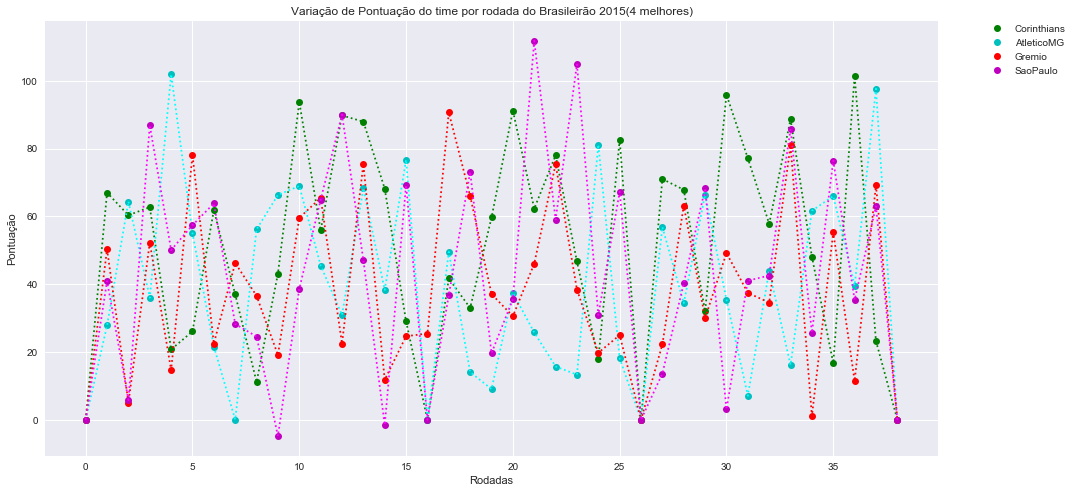

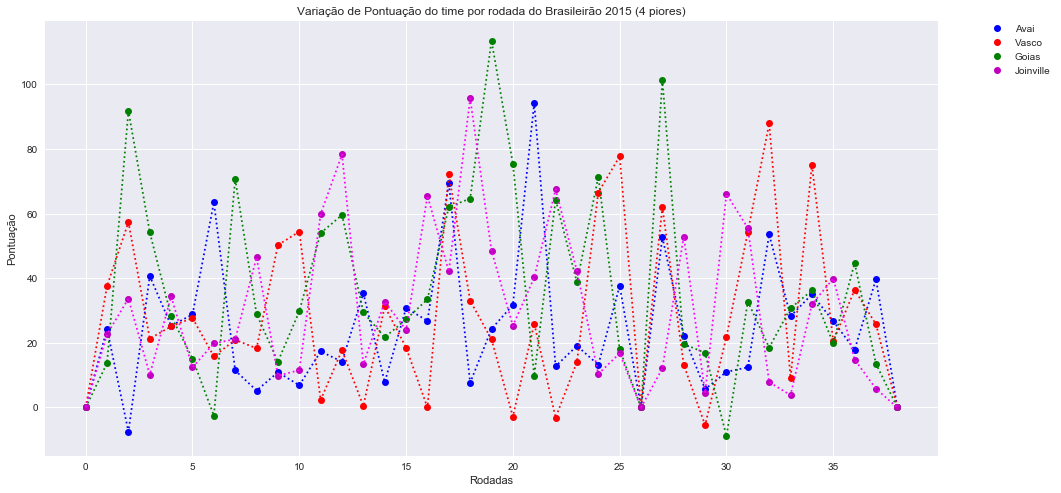

In [560]:
lista=np.arange(0,39,1)
listax=[]
listay=[]
listay2=[]
listay3=[]
listay4=[]
listay5=[]
listay6=[]
listay7=[]
listay8=[]
for i in range(len(lista)):
    x = data2015['Rodada'][i]
    listax.append(x)
    y = data2015['Corinthians'][i]
    listay.append(y)
    y2 = data2015['AtleticoMG'][i]
    listay2.append(y2)
    y3 = data2015['Gremio'][i]
    listay3.append(y3)
    y4 = data2015['SaoPaulo'][i]
    listay4.append(y4)
    y5 = data2015['Avai'][i]
    listay5.append(y5)
    y6 = data2015['Vasco'][i]
    listay6.append(y6)
    y7 = data2015['Goias'][i]
    listay7.append(y7)
    y8 = data2015['Joinville'][i]
    listay8.append(y8)

plt.figure(figsize=(16,8))
plt.plot(listax,listay,'go',label='Corinthians')
plt.plot(listax,listay,'k:', color='green')
plt.plot(listax,listay2,'co',label='AtleticoMG')
plt.plot(listax,listay2,'k:', color='cyan')
plt.plot(listax,listay3,'ro',label='Gremio')
plt.plot(listax,listay3,'k:', color='red')
plt.plot(listax,listay4,'mo',label='SaoPaulo')
plt.plot(listax,listay4,'k:', color='magenta')
plt.title("Variação de Pontuação do time por rodada do Brasileirão 2015(4 melhores)")
plt.xlabel('Rodadas')
plt.ylabel('Pontuação')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(16,8))
plt.plot(listax,listay5,'bo',label='Avai')
plt.plot(listax,listay5,'k:', color='blue')
plt.plot(listax,listay6,'ro',label='Vasco')
plt.plot(listax,listay6,'k:', color='red')
plt.plot(listax,listay7,'go',label='Goias')
plt.plot(listax,listay7,'k:', color='green')
plt.plot(listax,listay8,'mo',label='Joinville')
plt.plot(listax,listay8,'k:', color='magenta')
plt.title("Variação de Pontuação do time por rodada do Brasileirão 2015 (4 piores)")
plt.xlabel('Rodadas')
plt.ylabel('Pontuação')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [529]:
lista=np.arange(0,39,1)
listapal15=[]
listasan15=[]
listafla15=[]
listacam15=[]
listabot15=[]
listacap15=[]
listacor15=[]
listapon15=[]
listagre15=[]
listasao15=[]
listacha15=[]
listacru15=[]
listaflu15=[]
listaspo15=[]
listacfc15=[]
listavit15=[]
listaint15=[]
listafig15=[]
listascz15=[]
listaame15=[]
listavas15=[]
listagoi15=[]
listajec15=[]
listaava15=[]
lista15=lista
for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras15=palmeiras15[palmeiras15.Rodada==i]
    p_palmeiras15=p_palmeiras15.Preco.sum()
    listapal15.append(p_palmeiras15)
    ## santos
    p_santos15=santos15[santos15.Rodada==i]
    p_santos15=p_santos15.Preco.sum()
    listasan15.append(p_santos15)
    ## flamengo
    p_flamengo15=flamengo15[flamengo15.Rodada==i]
    p_flamengo15=p_flamengo15.Preco.sum()
    listafla15.append(p_flamengo15)
    ## atleticomg
    p_atleticomg15=atleticomg15[atleticomg15.Rodada==i]
    p_atleticomg15=p_atleticomg15.Preco.sum()
    listacam15.append(p_atleticomg15)
   
    ## atleticopr
    p_atleticopr15=atleticopr15[atleticopr15.Rodada==i]
    p_atleticopr15=p_atleticopr15.Preco.sum()
    listacap15.append(p_atleticopr15)
    
    
    ## corinthians
    p_corinthians15=corinthians15[corinthians15.Rodada==i]
    p_corinthians15=p_corinthians15.Preco.sum()
    listacor15.append(p_corinthians15)
    ## pontepreta
    p_pontepreta15=pontepreta15[pontepreta15.Rodada==i]
    p_pontepreta15=p_pontepreta15.Preco.sum()
    listapon15.append(p_pontepreta15)
    ## gremio
    p_gremio15=gremio15[gremio15.Rodada==i]
    p_gremio15=p_gremio15.Preco.sum()
    listagre15.append(p_gremio15)
  
    ## saopaulo
    p_saopaulo15=saopaulo15[saopaulo15.Rodada==i]
    p_saopaulo15=p_saopaulo15.Preco.sum()
    listasao15.append(p_saopaulo15)
    ## chapecoense
    p_chapecoense15=chapecoense15[chapecoense15.Rodada==i]
    p_chapecoense15=p_chapecoense15.Preco.sum()
    listacha15.append(p_chapecoense15)
  
     ## cruzeiro
    p_cruzeiro15=cruzeiro15[cruzeiro15.Rodada==i]
    p_cruzeiro15=p_cruzeiro15.Preco.sum()
    listacru15.append(p_cruzeiro15)

     ## fluminense
    p_fluminense15=fluminense15[fluminense15.Rodada==i]
    p_fluminense15=p_fluminense15.Preco.sum()
    listaflu15.append(p_fluminense15)

         ## sport
    p_sport15=sport15[sport15.Rodada==i]
    p_sport15=p_sport15.Preco.sum()
    listaspo15.append(p_sport15)


    
         ## coritiba
    p_coritiba15=coritiba15[coritiba15.Rodada==i]
    p_coritiba15=p_coritiba15.Preco.sum()
    listacfc15.append(p_coritiba15)

      
    ## internacional
    p_internacional15=internacional15[internacional15.Rodada==i]
    p_internacional15=p_internacional15.Preco.sum()
    listaint15.append(p_internacional15)

    ## figueirense
    p_figueirense15=figueirense15[figueirense15.Rodada==i]
    p_figueirense15=p_figueirense15.Preco.sum()
    listafig15.append(p_figueirense15)

  ## avai
    p_avai15=avai15[avai15.Rodada==i]
    p_avai15=p_avai15.Preco.sum()
    listaava15.append(p_avai15)

  ## vasco
    p_vasco15=vasco15[vasco15.Rodada==i]
    p_vasco15=p_vasco15.Preco.sum()
    listavas15.append(p_vasco15)
    
    ## joinville
    p_joinville15=joinville15[joinville15.Rodada==i]
    p_joinville15=p_joinville15.Preco.sum()
    listajec15.append(p_joinville15)
      
    ## goias
    p_goias15=goias15[goias15.Rodada==i]
    p_goias15=p_goias15.Preco.sum()
    listagoi15.append(p_goias15)   

In [511]:
#criando nova dataframe com o preço de todos os jogadores da equipe conforme as rodadas
z =pd.DataFrame([lista15,
listapal15,
listasan15,
listafla15,
listacam15,
listacap15,
listacor15,
listapon15,
listagre15,
listasao15,
listacha15,
listacru15,
listaflu15,
listaspo15,
listacfc15,
listaint15,
listafig15,
listavas15,
listagoi15,
listajec15,
listaava15]).T
z.columns = ['Rodada','Palmeiras','Santos','Flamengo','AtleticoMG','AtleticoPR','Corinthians','PontePreta','Gremio','SaoPaulo','Chapecoense',
'Cruzeiro','Fluminense','Sport','Coritiba','Internacional','Figueirense','Vasco','Goias','Joinville','Avai']                    
z

,Rodada,Palmeiras,Santos,Flamengo,AtleticoMG,AtleticoPR,Corinthians,PontePreta,Gremio,SaoPaulo,...,Cruzeiro,Fluminense,Sport,Coritiba,Internacional,Figueirense,Vasco,Goias,Joinville,Avai
0,0.0,319.00,265.00,234.00,298.00,262.00,543.00,215.00,249.00,284.00,...,361.00,280.00,241.00,0.00,333.00,208.00,274.00,171.00,208.00,183.00
1,1.0,305.65,248.64,228.55,302.31,295.23,542.22,241.45,238.88,281.44,...,332.14,302.80,250.14,0.00,305.57,204.03,268.08,174.15,212.11,184.90
2,2.0,304.62,256.67,224.01,297.72,288.09,324.22,257.17,237.83,261.52,...,302.94,299.12,256.08,224.01,329.23,221.72,275.75,208.79,210.51,172.15
3,3.0,302.13,248.43,222.66,289.26,315.88,328.56,256.88,229.89,277.69,...,286.93,289.79,264.56,219.47,318.57,220.34,272.75,222.59,206.31,180.67
4,4.0,318.96,255.61,228.85,307.09,306.20,291.92,259.49,217.02,275.08,...,284.42,280.67,268.93,210.13,325.74,230.90,270.94,214.98,203.81,180.55
5,5.0,307.13,253.52,220.93,302.40,313.99,285.75,271.11,231.76,275.25,...,282.52,297.21,276.73,202.36,315.04,222.20,269.04,209.37,197.07,182.32
6,6.0,313.19,254.16,226.19,287.45,320.84,297.49,268.64,225.43,280.17,...,287.76,288.39,269.33,208.50,329.73,224.37,256.96,204.09,207.68,208.69
7,7.0,316.54,251.16,241.77,287.45,304.99,287.37,277.36,234.94,273.87,...,287.56,281.52,271.26,221.32,322.38,228.02,248.57,218.35,203.08,198.66
8,8.0,302.43,256.04,234.04,293.70,297.33,269.40,272.20,240.13,257.18,...,286.40,291.64,271.31,210.31,322.38,228.02,242.00,215.86,207.11,184.34
9,9.0,320.10,247.17,232.53,298.28,291.63,262.26,281.27,236.73,258.54,...,285.39,277.71,265.56,216.53,322.19,234.05,246.30,205.51,188.81,184.38


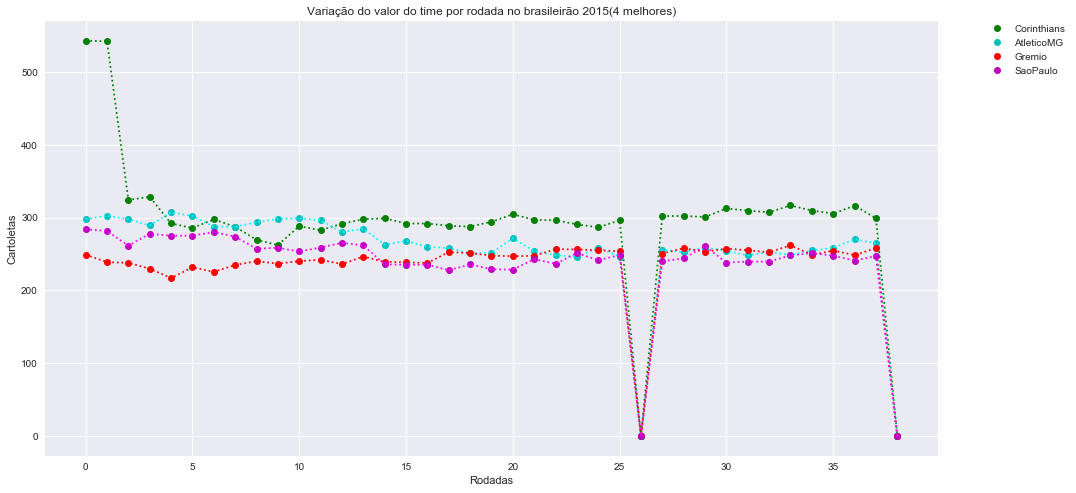

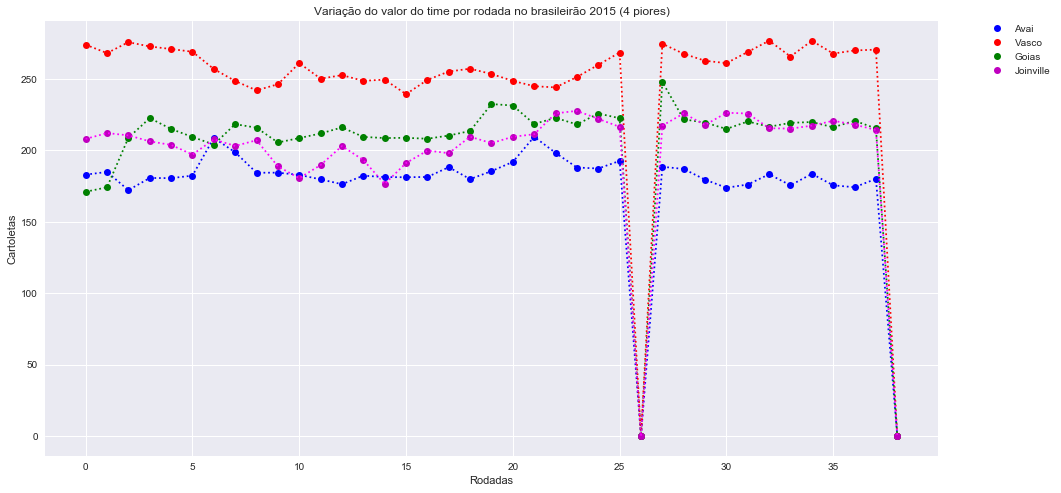

Observações: por uma falha na database de 2015, não foram computados os valores das rodadas 26 e 38


In [517]:
lista=np.arange(0,39,1)
listax=[]
listay=[]
listay2=[]
listay3=[]
listay4=[]
listay5=[]
listay6=[]
listay7=[]
listay8=[]

for i in range(len(lista)):
    x = z['Rodada'][i]
    listax.append(x)
    y = z['Corinthians'][i]
    listay.append(y)
    y2 = z['AtleticoMG'][i]
    listay2.append(y2)
    y3 = z['Gremio'][i]
    listay3.append(y3)
    y4 = z['SaoPaulo'][i]
    listay4.append(y4)
    y5 = z['Avai'][i]
    listay5.append(y5)
    y6 = z['Vasco'][i]
    listay6.append(y6)
    y7 = z['Goias'][i]
    listay7.append(y7)
    y8 = z['Joinville'][i]
    listay8.append(y8)

plt.figure(figsize=(16,8))
plt.plot(listax,listay,'go',label='Corinthians')
plt.plot(listax,listay,'k:', color='green')
plt.plot(listax,listay2,'co',label='AtleticoMG')
plt.plot(listax,listay2,'k:', color='cyan')
plt.plot(listax,listay3,'ro',label='Gremio')
plt.plot(listax,listay3,'k:', color='red')
plt.plot(listax,listay4,'mo',label='SaoPaulo')
plt.plot(listax,listay4,'k:', color='magenta')
plt.title("Variação do valor do time por rodada no brasileirão 2015(4 melhores)")
plt.xlabel('Rodadas')
plt.ylabel('Cartoletas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(16,8))
plt.plot(listax,listay5,'bo',label='Avai')
plt.plot(listax,listay5,'k:', color='blue')
plt.plot(listax,listay6,'ro',label='Vasco')
plt.plot(listax,listay6,'k:', color='red')
plt.plot(listax,listay7,'go',label='Goias')
plt.plot(listax,listay7,'k:', color='green')
plt.plot(listax,listay8,'mo',label='Joinville')
plt.plot(listax,listay8,'k:', color='magenta')
plt.title("Variação do valor do time por rodada no brasileirão 2015 (4 piores)")
plt.xlabel('Rodadas')
plt.ylabel('Cartoletas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print("Observações: por uma falha na database de 2015, não foram computados os valores das rodadas 26 e 38")

In [532]:
somapalmeiras15=[sum(listapal15[:y]) for y in range(1, 39 + 1)]
somasantos15=[sum(listasan15[:y]) for y in range(1, 39 + 1)]
somaflamengo15=[sum(listafla15[:y]) for y in range(1, 39 + 1)]
somaatleticomg15=[sum(listacam15[:y]) for y in range(1, 39 + 1)]
somaatleticopr15=[sum(listacap15[:y]) for y in range(1, 39 + 1)]
somacorinthians15=[sum(listacor15[:y]) for y in range(1, 39 + 1)]
somapontepreta15=[sum(listapon15[:y]) for y in range(1, 39 + 1)]
somagremio15=[sum(listagre15[:y]) for y in range(1, 39 + 1)]
somasaopaulo15=[sum(listasao15[:y]) for y in range(1, 39 + 1)]
somachapecoense15=[sum(listacha15[:y]) for y in range(1, 39 + 1)]
somacruzeiro15=[sum(listacru15[:y]) for y in range(1, 39 + 1)]
somafluminense15=[sum(listaflu15[:y]) for y in range(1, 39 + 1)]
somasport15=[sum(listaspo15[:y]) for y in range(1, 39 + 1)]
somacoritiba15=[sum(listacfc15[:y]) for y in range(1, 39 + 1)]
somainternacional15=[sum(listaint15[:y]) for y in range(1, 39 + 1)]
somafigueirense15=[sum(listafig15[:y]) for y in range(1, 39 + 1)]
somavasco15=[sum(listavas15[:y]) for y in range(1, 39 + 1)]
somagoias15=[sum(listagoi15[:y]) for y in range(1, 39 + 1)]
somajoinville15=[sum(listajec15[:y]) for y in range(1, 39 + 1)]
somaavai15=[sum(listaava15[:y]) for y in range(1, 39 + 1)]

In [533]:
listasoma15 = pd.DataFrame([lista15,
somapalmeiras15,
somasantos15,
somaflamengo15,
somaatleticomg15,
somaatleticopr15,
somacorinthians15,
somapontepreta15,
somagremio15,
somasaopaulo15,
somachapecoense15,
somacruzeiro15,
somafluminense15,
somasport15,
somacoritiba15,
somainternacional15,
somafigueirense15,
somavasco15,
somagoias15,
somajoinville15,
somaavai15]).T
listasoma15.columns = ['Rodada','Palmeiras','Santos','Flamengo','AtleticoMG','AtleticoPR','Corinthians','PontePreta','Gremio','SaoPaulo','Chapecoense',
'Cruzeiro','Fluminense','Sport','Coritiba','Internacional','Figueirense','Vasco','Goias','Joinville','Avai']                    
listasoma

,Rodada,Palmeiras,Santos,Flamengo,AtleticoMG,Botafogo,AtleticoPR,Corinthians,PontePreta,Gremio,...,Chapecoense,Cruzeiro,Fluminense,Sport,Coritiba,Vitoria,Internacional,Figueirense,SantaCruz,AmericaMG
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.0,86.51,23.56,79.75,64.50,18.22,-19.42,55.96,40.15,32.29,...,34.58,11.60,66.65,19.20,62.84,3.27,22.75,53.24,49.31,37.20
2,2.0,91.75,56.40,131.13,96.14,81.38,-4.58,94.80,81.50,111.93,...,109.85,47.16,96.00,45.82,86.29,52.36,70.75,97.53,70.58,32.51
3,3.0,163.31,87.49,166.23,122.21,157.42,20.07,159.82,92.30,229.97,...,144.00,60.36,111.27,65.57,132.76,83.45,118.64,127.31,147.82,50.51
4,4.0,180.22,109.42,188.48,153.52,181.75,59.56,236.29,119.03,288.77,...,165.27,120.03,188.94,78.88,142.80,144.54,202.09,166.26,168.33,99.27
5,5.0,228.00,122.62,253.50,194.21,210.66,96.76,302.07,166.05,333.61,...,211.31,206.32,216.10,151.21,207.20,139.30,242.24,217.97,171.06,123.77
6,6.0,286.15,211.75,281.43,238.28,222.44,163.09,349.09,175.10,377.25,...,243.38,237.08,265.95,223.43,230.65,219.37,257.62,247.97,181.86,189.07
7,7.0,334.70,280.70,313.39,259.88,247.53,201.49,378.34,204.77,398.30,...,270.11,270.79,293.00,237.50,303.30,259.62,321.44,311.90,195.61,205.32
8,8.0,368.63,372.88,392.04,284.32,324.44,223.96,389.14,266.62,456.77,...,306.66,290.21,343.07,256.48,336.03,284.82,421.48,322.59,232.81,226.92
9,9.0,443.58,397.10,413.64,400.07,362.84,280.58,452.74,277.20,535.32,...,366.44,286.50,381.69,318.01,368.32,335.00,479.08,368.19,259.10,265.87


In [538]:
lista15=np.arange(0,39,1)
listax=[]
listay=[]
listax2=[]
listay2=[]
listax3=[]
listay3=[]
listax4=[]
listay4=[]
listax5=[]
listay5=[]
listax6=[]
listay6=[]

listax7=[]
listay7=[]

listax8=[]
listay8=[]


listax9=[]
listay9=[]
for i in range(len(lista)):
    #####G4
    x = listasoma15['Rodada'][i]
    listax.append(x)
    y = listasoma15['Corinthians'][i]
    listay.append(y)
    
    x2 = listasoma15['Rodada'][i]
    listax2.append(x2)
    y2 = listasoma15['AtleticoMG'][i]
    listay2.append(y2)
    
    x3 = listasoma15['Rodada'][i]
    listax3.append(x3)
    y3 = listasoma15['Gremio'][i]
    listay3.append(y3)
    
    x4 = listasoma15['Rodada'][i]
    listax4.append(x4)
    y4 = listasoma15['SaoPaulo'][i]
    listay4.append(y4)
    
    #############z4
    
    x5 = listasoma15['Rodada'][i]
    listax5.append(x5)
    y5 = listasoma15['Avai'][i]
    listay5.append(y5)

    x6 = listasoma15['Rodada'][i]
    listax6.append(x6)
    y6 = listasoma15['Vasco'][i]
    listay6.append(y6)
    
    x7 = listasoma15['Rodada'][i]
    listax7.append(x7)
    y7 = listasoma15['Goias'][i]
    listay7.append(y7)
    
    x8 = listasoma15['Rodada'][i]
    listax8.append(x8)    
    y8 = listasoma15['Joinville'][i]
    listay8.append(y8)
#caso queira plotar em Matplotlib deve-se tirar o comentário, o grafico fica melhor em seaborn  
'''    
plt.figure(figsize=(16,8))

############ G4
plt.plot(listax,listay,'^',label='Corinthains')
plt.plot(listax,listay,'k:')#, color='blue')

plt.plot(listax2,listay2,"^",label='AtleticoMG')
plt.plot(listax2,listay2,'k:')#, color='tan')

plt.plot(listax3,listay3,'^',label='Gremio')
plt.plot(listax3,listay3,'k:')#, color='green')

plt.plot(listax4,listay4,'y>',label='SaoPaulo')
plt.plot(listax4,listay4,'k:', color='yellow')


##### Z4

plt.plot(listax5,listay5,'^',label='Avai')
plt.plot(listax5,listay5,'k:', color='red')
                  

plt.plot(listax6,listay6,'^',label='Vasco')
plt.plot(listax6,listay6,'k:', color='darkgrey')
         
plt.plot(listax7,listay7,'c>',label='Goias')
plt.plot(listax7,listay7,'k:', color='darkslategray')         

plt.plot(listax8,listay8,'^',label='Joinville')
plt.plot(listax8,listay8,'k:')# color='cyan')
         

plt.title("Pontuação acumulada das equipes por rodada no brasileirão de 2015")
#plt.title("Pontuação acumulada das equipes por rodada no hgf de 2015")

#plt.subtitle('mi')
plt.xlabel('Rodadas')
plt.ylabel('Pontuação')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
'''
print()

In [535]:
novo=pd.DataFrame([listax,listay,listay2,listay3]).T
novo.columns=["listax","listay","listay2",'listay3']
novo.listax=novo.listax.astype(int)


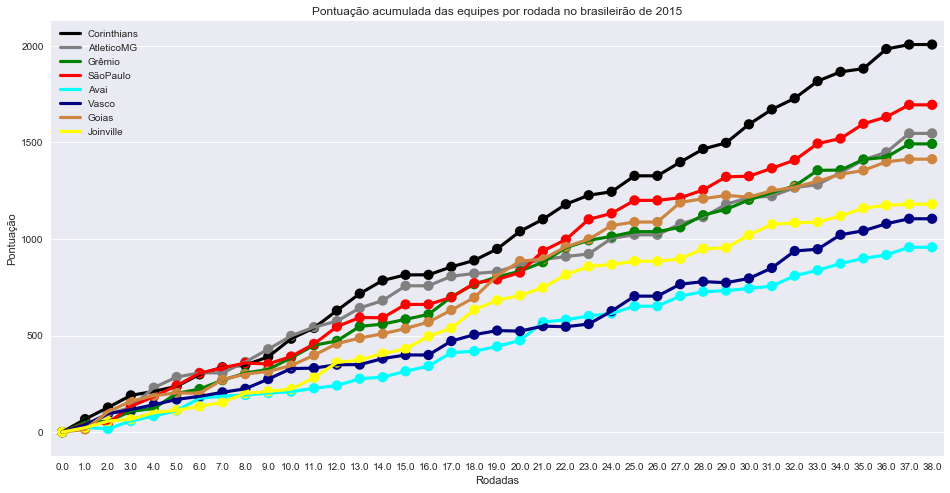

In [444]:

f, ax=plt.subplots(1,1, figsize=(16,8))
sns.pointplot(ax=ax, x=listax, y=listay, data=listasoma, color='black')
sns.pointplot(ax=ax, x=listax, y=listay2, data=listasoma,color='grey')
sns.pointplot(ax=ax, x=listax, y=listay3, data=listasoma,color='green')
sns.pointplot(ax=ax, x=listax, y=listay4, data=listasoma,color='red')
sns.pointplot(ax=ax, x=listax, y=listay5, data=listasoma,color='cyan')
sns.pointplot(ax=ax, x=listax, y=listay6, data=listasoma,color='navy')
sns.pointplot(ax=ax, x=listax, y=listay7, data=listasoma,color='peru')
sns.pointplot(ax=ax, x=listax, y=listay8, data=listasoma,color='yellow')

plt.xlabel('Rodadas')
plt.ylabel('Pontuação')
ax.legend(handles=ax.lines[::len(novo)+1],labels=["Corinthians", "AtleticoMG",'Grêmio', 'SãoPaulo', 'Avai', 'Vasco', 'Goias', 'Joinville'])
plt.title("Pontuação acumulada das equipes por rodada no brasileirão de 2015")
plt.show()


## Tabela oficial do Brasileirão 2015
![2015](tabela-2015.png)


## Conclusão 
Ao obtermos a pontuação acumulada no Fantasy Game “Cartola FC de cada um destes times, podemos determinar se o conceito de “Jogar Bonito” definido por nós, que seria sinônimo de ir bem no fantasy game, é também sinônimo de ser o melhor no Campeonato Brasileiro de Futebol. O Palmeiras, Campeão Brasileiro do ano de 2016, foi apenas o terceiro colocado no Cartola FC. Enquanto o Flamengo, terceiro colocado no Campeonato Brasileiro de Futebol, foi o “Campeão” desta disputa. Avaliamos assim que o melhor futebol jogado ao longo do campeonato não representa o maior sucesso deste clube. É interessante destacar que esta avaliação feita por nós condiz com a avaliação de diversos especialistas da época que apontavam o futebol do Rubro Negro Carioca (Flamengo) como mais vistoso que o do clube paulista (Palmeiras).


# Trabalho em equipe
### Michel ficou responsável pela escolha do tema, de testes iniciais, de transformar matplotlib em seaborn,  de  parte da parte Teórica e por colocar os arquivos no GitHub.

### Pedro ficou responsável por filtrar as tabelas, usar a técnica para anos anteriores e em redigir a parte teórica.

### Tiago ficou responsável pela criação das listas de Python necessárias para o plot dos gráficos e de criação de novos datasets com base nos filtros feitos.
